## **Machine Learning and Advanced Analytics Coursework**

### **Churn Prediction for FoodCorp**

**Note: Computing Resource used is DBR 15.4 LTS ML (Non-GPU)**

In [0]:
%python
import urllib
reset = True
data_id = 77
exec(urllib.request.urlopen('https://drive.google.com/uc?export=download&id=151MlxWk3Nk-Q3emLDyOFRxPA8lCqgGt-').read())

  Obtaining dependency information for dropbox from https://files.pythonhosted.org/packages/2d/de/95d8204d9a20fbdb353c5f8e4229b0fcb90f22b96f8246ff1f47c8a45fd5/dropbox-12.0.2-py3-none-any.whl.metadata
  Obtaining dependency information for stone<3.3.3,>=2 from https://files.pythonhosted.org/packages/5c/92/d0c83f63d3518e5f0b8a311937c31347349ec9a47b209ddc17f7566f58fc/stone-3.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for ply>=3.4 from https://files.pythonhosted.org/packages/a3/58/35da89ee790598a0700ea49b2a66594140f44dec458c07e8e3d4979137fc/ply-3.11-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.1/572.1 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 12.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


  Obtaining dependency information for tabulate from https://files.pythonhosted.org/packages/40/44/4a5f08c96eb108af5cb50b41f76142f0afa346dfa99d5296fe7202a11854/tabulate-0.9.0-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


  Obtaining dependency information for sqldf from https://files.pythonhosted.org/packages/60/4b/1a9f9f65bcc7cd8d724c700f469f9bbe3e796b3543e0d346e3e352a283d7/sqldf-0.4.2-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


Initaializing ml77 database.... on first run this will take a couple of minutes.
Loaded table: customers
Loaded table: products
Loaded table: receipt_lines
Loaded table: receipts
Loaded table: stores
Done.

Your individual report for this dataset can be downloaded by clicking the link / copying the URL into a browser:


<string>:116: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display


All tables from your dataset as listed below. Tables are linked with one-to-many relationships when the field names are the same. Use the SQL:
SHOW TABLES
to list all tables, including those you have generated.
┏━━━━━━━━━━━━━┓
┃ customers   ┃
┣━━━━━━━━━━━━━┫
┃ customer_id ┃
┃ first       ┃
┃ last        ┃
┃ dob         ┃
┗━━━━━━━━━━━━━┛
┏━━━━━━━━━━━━━━━━━━━━━━┓
┃ products             ┃
┣━━━━━━━━━━━━━━━━━━━━━━┫
┃ product_code         ┃
┃ product_details      ┃
┃ department_code      ┃
┃ department_name      ┃
┃ category_code        ┃
┃ category_details     ┃
┃ sub_category_code    ┃
┃ sub_category_details ┃
┗━━━━━━━━━━━━━━━━━━━━━━┛
┏━━━━━━━━━━━━━━━━━┓
┃ receipt_lines   ┃
┣━━━━━━━━━━━━━━━━━┫
┃ receipt_line_id ┃
┃ receipt_id      ┃
┃ product_code    ┃
┃ qty             ┃
┃ value           ┃
┗━━━━━━━━━━━━━━━━━┛
┏━━━━━━━━━━━━━━┓
┃ receipts     ┃
┣━━━━━━━━━━━━━━┫
┃ receipt_id   ┃
┃ purchased_at ┃
┃ customer_id  ┃
┃ store_code   ┃
┃ till_number  ┃
┗━━━━━━━━━━━━━━┛
┏━━━━━━━━━━━━┓
┃ stores     

### 1. Data Loading

In [0]:
# Load tables from the metastore into DataFrame variables
customers_df = spark.table("customers")
products_df = spark.table("products")
receipt_lines_df = spark.table("receipt_lines")
receipts_df = spark.table("receipts")
stores_df = spark.table("stores")

In [0]:
print("Customers:")
customers_df.show(10, truncate=False)

Customers:
+-----------+------+-------+----------+
|customer_id|first |last   |dob       |
+-----------+------+-------+----------+
|3          |NULL  |Garcia |NULL      |
|5          |NULL  |Brown  |NULL      |
|6          |NULL  |Bryant |NULL      |
|8          |NULL  |Beabout|NULL      |
|10         |Lauren|Sanchez|1986-03-26|
|12         |NULL  |Meek   |NULL      |
|16         |NULL  |Rucker |NULL      |
|19         |NULL  |Fox    |NULL      |
|20         |NULL  |Doss   |NULL      |
|22         |Dan   |Guedry |1999-10-29|
+-----------+------+-------+----------+
only showing top 10 rows



In [0]:
print("Products:")
products_df.show(10, truncate=False)

Products:
+------------+----------------+---------------+-------------------+-------------+----------------+-----------------+--------------------+
|product_code|product_details |department_code|department_name    |category_code|category_details|sub_category_code|sub_category_details|
+------------+----------------+---------------+-------------------+-------------+----------------+-----------------+--------------------+
|5046        |TAYTO LITES CHEE|-2             |RI Missing Departme|-2           |RI Missing Secti|-2               |RI Missing Sub_Secti|
|3123        |RED BULL STIMULA|-2             |RI Missing Departme|-2           |RI Missing Secti|-2               |RI Missing Sub_Secti|
|16843       |BEECHLANDS EGGS |-2             |RI Missing Departme|-2           |RI Missing Secti|-2               |RI Missing Sub_Secti|
|10828       |FREE RANGE EGGS |-2             |RI Missing Departme|-2           |RI Missing Secti|-2               |RI Missing Sub_Secti|
|2395        |HEB BREWIN

In [0]:
print("Receipt Lines:")
receipt_lines_df.show(10, truncate=False)

Receipt Lines:
+---------------+----------+------------+---+-----+
|receipt_line_id|receipt_id|product_code|qty|value|
+---------------+----------+------------+---+-----+
|197775         |96493     |317         |1  |3.23 |
|240123         |95177     |3164        |1  |7.99 |
|240107         |63155     |3164        |1  |7.99 |
|154830         |80448     |16189       |1  |3.09 |
|221774         |67745     |16189       |1  |3.09 |
|154901         |36797     |16189       |1  |3.09 |
|10712          |36642     |16189       |1  |3.09 |
|684657         |67293     |9117        |1  |1.49 |
|633113         |92620     |9117        |1  |1.49 |
|570454         |85519     |9117        |1  |1.49 |
+---------------+----------+------------+---+-----+
only showing top 10 rows



In [0]:
print("Receipts:")
receipts_df.show(10, truncate=False)

Receipts:
+----------+------------+-----------+----------+-----------+
|receipt_id|purchased_at|customer_id|store_code|till_number|
+----------+------------+-----------+----------+-----------+
|1         |2021-04-30  |10690      |3         |3          |
|2         |2020-10-12  |3616       |2         |7          |
|3         |2021-05-19  |11767      |0         |6          |
|4         |2020-10-20  |8936       |3         |3          |
|5         |2021-09-14  |2211       |2         |6          |
|6         |2020-10-13  |6726       |3         |1          |
|7         |2021-10-20  |1245       |3         |5          |
|8         |2021-10-12  |15640      |3         |7          |
|9         |2020-11-21  |10221      |2         |4          |
|10        |2021-10-23  |6746       |3         |3          |
+----------+------------+-----------+----------+-----------+
only showing top 10 rows



In [0]:
print("Stores:")
stores_df.show(10, truncate=False)

Stores:
+----------+-------------------------+--------+---------+----------+
|store_code|address                  |postcode|lat      |lng       |
+----------+-------------------------+--------+---------+----------+
|0         |Trinity Sq, Nottingham   |NG1 4AF |52.955905|-1.148334 |
|1         |55 Temple Row, Birmingham|B2 5AL  |52.480652|-1898193.0|
|2         |Lowndes Square, London   |SW1X 9JJ|51.499171|-0.157963 |
|3         |122 Leadenhall St, London|EC3V 4AB|51.513567|-0.082107 |
+----------+-------------------------+--------+---------+----------+



### 2. Data Exploration

In [0]:
from pyspark.sql import functions as F

# Descriptive statistics for customers
print("Customers Descriptive Statistics:")
customers_df.describe().show()

# Count null values for each column in customers
print("Null counts in 'customers' table:")
nulls_customers = customers_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in customers_df.columns])
nulls_customers.show()

# Print schema to check data types
print("Customers Schema:")
customers_df.printSchema()

Customers Descriptive Statistics:
+-------+-----------------+---------+---------+
|summary|      customer_id|    first|     last|
+-------+-----------------+---------+---------+
|  count|             7742|      988|     7742|
|   mean|8203.898863342805|     NULL|     NULL|
| stddev|4720.645788294941|     NULL|     NULL|
|    min|                3|Adalberto|  Aadland|
|    max|            16327|     Zona|Zwolinski|
+-------+-----------------+---------+---------+

Null counts in 'customers' table:
+-----------+-----+----+----+
|customer_id|first|last| dob|
+-----------+-----+----+----+
|          0| 6754|   0|6753|
+-----------+-----+----+----+

Customers Schema:
root
 |-- customer_id: integer (nullable = true)
 |-- first: string (nullable = true)
 |-- last: string (nullable = true)
 |-- dob: date (nullable = true)



In [0]:
# Descriptive statistics for products
print("Products Descriptive Statistics:")
products_df.describe().show()

# Count null values for each column in products
print("Null counts in 'products' table:")
nulls_products = products_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in products_df.columns])
nulls_products.show()

# Print schema to check data types
print("Products Schema:")
products_df.printSchema()

Products Descriptive Statistics:
+-------+-----------------+----------------+------------------+----------------+-----------------+----------------+------------------+--------------------+
|summary|     product_code| product_details|   department_code| department_name|    category_code|category_details| sub_category_code|sub_category_details|
+-------+-----------------+----------------+------------------+----------------+-----------------+----------------+------------------+--------------------+
|  count|            18589|           18589|             18589|           18589|            18589|           18589|             18589|               18589|
|   mean|           9295.0|            NULL|23.952498789606757|            NULL|46.90117811609016|            NULL| 59.97272580558395|                 1.0|
| stddev|5366.326412609146|            NULL| 9.662752679730833|            NULL|23.81290889611441|            NULL|25.883927117429685|                 0.0|
|    min|                1|(NEC

In [0]:
# Descriptive statistics for receipt_lines
print("Receipt Lines Descriptive Statistics:")
receipt_lines_df.describe().show()

# Count null values for each column in receipt_lines
print("Null counts in 'receipt_lines' table:")
nulls_receipt_lines = receipt_lines_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in receipt_lines_df.columns])
nulls_receipt_lines.show()

# Print schema to check data types
print("Receipt Lines Schema:")
receipt_lines_df.printSchema()

Receipt Lines Descriptive Statistics:
+-------+-----------------+-----------------+-----------------+------------------+------------------+
|summary|  receipt_line_id|       receipt_id|     product_code|               qty|             value|
+-------+-----------------+-----------------+-----------------+------------------+------------------+
|  count|           905736|           905736|           905736|            905736|            905736|
|   mean|460131.9081288587|48344.33576560941|9558.660808447494|1.2071133310368585|1823.3673066213548|
| stddev|262121.5511660272|27941.82023116414| 5348.99780338792|0.6022196960009205|134958.95921254778|
|    min|                1|                1|                1|                -2|             -20.0|
|    max|           913829|            96593|            18589|                42|         9999999.0|
+-------+-----------------+-----------------+-----------------+------------------+------------------+

Null counts in 'receipt_lines' table:
+----

In [0]:
# Descriptive statistics for receipts
print("Receipts Descriptive Statistics:")
receipts_df.describe().show()

# Count null values for each column in receipts
print("Null counts in 'receipts' table:")
nulls_receipts = receipts_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in receipts_df.columns])
nulls_receipts.show()

# Print schema to check data types
print("Receipts Schema:")
receipts_df.printSchema()

Receipts Descriptive Statistics:
+-------+------------------+-----------------+------------------+------------------+
|summary|        receipt_id|      customer_id|        store_code|       till_number|
+-------+------------------+-----------------+------------------+------------------+
|  count|             95290|            95290|             95290|             95290|
|   mean|48295.616234652116| 8147.94133697135|2.0699128974708785|3.6078392276209468|
| stddev| 27893.32314780054|4772.402159223537|0.9089581488612126| 2.381788076267455|
|    min|                 1|                3|                 0|                 1|
|    max|             96593|            16327|                 3|                18|
+-------+------------------+-----------------+------------------+------------------+

Null counts in 'receipts' table:
+----------+------------+-----------+----------+-----------+
|receipt_id|purchased_at|customer_id|store_code|till_number|
+----------+------------+-----------+---------

In [0]:
# Checking distinct customer counts
receipts_df.select("customer_id").distinct().count()

7618

In [0]:
# Descriptive statistics for stores
print("Stores Descriptive Statistics:")
stores_df.describe().show()

# Count null values for each column in stores
print("Null counts in 'stores' table:")
nulls_stores = stores_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in stores_df.columns])
nulls_stores.show()

# Print schema to check data types
print("Stores Schema:")
stores_df.printSchema()

Stores Descriptive Statistics:
+-------+------------------+--------------------+--------+------------------+-----------------+
|summary|        store_code|             address|postcode|               lat|              lng|
+-------+------------------+--------------------+--------+------------------+-----------------+
|  count|                 4|                   4|       4|                 4|                4|
|   mean|               1.5|                NULL|    NULL|52.112323749999995|   -474548.597101|
| stddev|1.2909944487358056|                NULL|    NULL|0.7261223417585468|949096.2685994576|
|    min|                 0|122 Leadenhall St...|  B2 5AL|         51.499171|       -1898193.0|
|    max|                 3|Trinity Sq, Notti...|SW1X 9JJ|         52.955905|        -0.082107|
+-------+------------------+--------------------+--------+------------------+-----------------+

Null counts in 'stores' table:
+----------+-------+--------+---+---+
|store_code|address|postcode|lat|ln

### 3. Checking and fixing anomalies

In [0]:
# Count the number of rows where value equals 9999999.0 in receipt_lines
anomaly_count = receipt_lines_df.filter(F.col("value") == 9999999.0).count()
print("Number of rows with value = 9999999.0:", anomaly_count)

# Display the rows with the anomalous value
receipt_lines_df.filter(F.col("value") == 9999999.0).show(truncate=False)

Number of rows with value = 9999999.0: 165
+---------------+----------+------------+---+---------+
|receipt_line_id|receipt_id|product_code|qty|value    |
+---------------+----------+------------+---+---------+
|100509         |6081      |15430       |1  |9999999.0|
|100528         |6081      |13486       |1  |9999999.0|
|100527         |6081      |1623        |1  |9999999.0|
|100524         |6081      |9110        |1  |9999999.0|
|100520         |6081      |4133        |1  |9999999.0|
|100517         |6081      |17568       |1  |9999999.0|
|100516         |6081      |2173        |1  |9999999.0|
|100511         |6081      |9364        |1  |9999999.0|
|437313         |26749     |11280       |1  |9999999.0|
|100514         |6081      |64          |2  |9999999.0|
|326271         |7871      |16813       |2  |9999999.0|
|326278         |7871      |6274        |2  |9999999.0|
|326281         |7871      |2757        |1  |9999999.0|
|100525         |6081      |4320        |2  |9999999.0|
|1005

In [0]:
# Compute approximate quantiles for the "value" column
quantiles = receipt_lines_df.approxQuantile("value", [0.9, 0.95, 0.99, 1.0], 0.01)
print("Approximate quantiles for 'value':")
print("90th percentile: ", quantiles[0])
print("95th percentile: ", quantiles[1])
print("99th percentile: ", quantiles[2])
print("Max value (100th percentile): ", quantiles[3])


Approximate quantiles for 'value':
90th percentile:  2.95
95th percentile:  4.11
99th percentile:  9999999.0
Max value (100th percentile):  9999999.0


In [0]:
# Cleaned view for receipt_lines
# Excluding -ve values from qty, value and the anomaly value of 9999999.0
spark.sql("""
CREATE OR REPLACE TEMP VIEW receipt_lines_clean AS
SELECT *
FROM receipt_lines
WHERE qty >= 0 
  AND value >= 0
  AND value != 9999999.0
""")

# Cleaned view
clean_df = spark.sql("SELECT * FROM receipt_lines_clean LIMIT 10")
clean_df.show(10, truncate=False)

+---------------+----------+------------+---+-----+
|receipt_line_id|receipt_id|product_code|qty|value|
+---------------+----------+------------+---+-----+
|197775         |96493     |317         |1  |3.23 |
|240123         |95177     |3164        |1  |7.99 |
|240107         |63155     |3164        |1  |7.99 |
|154830         |80448     |16189       |1  |3.09 |
|221774         |67745     |16189       |1  |3.09 |
|154901         |36797     |16189       |1  |3.09 |
|10712          |36642     |16189       |1  |3.09 |
|684657         |67293     |9117        |1  |1.49 |
|633113         |92620     |9117        |1  |1.49 |
|570454         |85519     |9117        |1  |1.49 |
+---------------+----------+------------+---+-----+



In [0]:
# Cleaned view for stores
spark.sql("""
CREATE OR REPLACE TEMP VIEW stores_clean AS
SELECT 
  store_code,
  address,
  postcode,
  lat,
  -- For store_code = 1, the recorded lng (-1898193.0) is incorrect.
  -- Based on the store's address ("55 Temple Row, Birmingham") and postcode ("B2 5AL"),
  -- the expected longitude for Birmingham is approximately -1.898193.
  -- Therefore, replacing the erroneous value with the corrected longitude.
  CASE 
    WHEN store_code = 1 THEN -1.898193 
    ELSE lng 
  END AS lng
FROM stores
""")

corrected_stores = spark.sql("SELECT * FROM stores_clean")
corrected_stores.show(truncate=False)

+----------+-------------------------+--------+---------+---------+
|store_code|address                  |postcode|lat      |lng      |
+----------+-------------------------+--------+---------+---------+
|0         |Trinity Sq, Nottingham   |NG1 4AF |52.955905|-1.148334|
|1         |55 Temple Row, Birmingham|B2 5AL  |52.480652|-1.898193|
|2         |Lowndes Square, London   |SW1X 9JJ|51.499171|-0.157963|
|3         |122 Leadenhall St, London|EC3V 4AB|51.513567|-0.082107|
+----------+-------------------------+--------+---------+---------+



## 4. Feature Engineering

### 4.1 Churn Calculation

In [0]:
# Parameterize the temporal boundaries

churn_window    = 38   # days of inactivity → churn label window
lookback_window = 90   # days of history for features
tumbling_window = 7    # days between successive snapshots (weekly)
num_weeks       = 26   # keep only the most recent 26 weeks (≈6 months)
max_gaps        = 5    # for inter-purchase interval
decay_rate      = 0.01 # for recency-weighted monetary

In [0]:
# 4.1.1 GENERATE WEEKLY REFERENCE DATES

# Creates a temporary view (`reference_dates`) that contains the
# most recent 'num_weeks' weekly snapshots ('ref_date'), each spaced by
# 'tumbling_window' days, starting after the initial lookback period and
# ending before the churn‐label window.

# Compute the view
spark.sql(f"""
  CREATE OR REPLACE TEMP VIEW reference_dates AS
  WITH bounds AS (
    -- Determine the earliest and latest valid dates for snapshots
    SELECT
      DATE_ADD(MIN(purchased_at), {lookback_window}) AS start_date,
      DATE_SUB(MAX(purchased_at), {churn_window}) AS end_date
    FROM receipts
  ),
  all_weeks AS (
    -- Generate a sequence of dates at 'tumbling_window' day intervals
    SELECT
      EXPLODE(
        SEQUENCE(start_date, end_date, INTERVAL {tumbling_window} DAY)
      ) AS ref_date
    FROM bounds
  ),
  top_n AS (
    -- Rank the generated dates in descending order
    SELECT
      ref_date,
      ROW_NUMBER() OVER (ORDER BY ref_date DESC) AS rn
    FROM all_weeks
  )
  -- Keep only the latest 'num_weeks' snapshots, sorted chronologically
  SELECT ref_date
  FROM top_n
  WHERE rn <= {num_weeks}
  ORDER BY ref_date
""")

spark.sql("SELECT * FROM reference_dates ORDER BY ref_date").show(26, truncate=False)

+----------+
|ref_date  |
+----------+
|2021-08-17|
|2021-08-24|
|2021-08-31|
|2021-09-07|
|2021-09-14|
|2021-09-21|
|2021-09-28|
|2021-10-05|
|2021-10-12|
|2021-10-19|
|2021-10-26|
|2021-11-02|
|2021-11-09|
|2021-11-16|
|2021-11-23|
|2021-11-30|
|2021-12-07|
|2021-12-14|
|2021-12-21|
|2021-12-28|
|2022-01-04|
|2022-01-11|
|2022-01-18|
|2022-01-25|
|2022-02-01|
|2022-02-08|
+----------+



In [0]:
# Sanity check to verify that each reference date is exactly 
# 'tumbling_window' days apart, counting backwards from the latest date.

spark.sql(f"""
WITH numbered AS (
  -- Assign a descending rank to each ref_date
  SELECT
    ref_date,
    ROW_NUMBER() OVER (ORDER BY ref_date DESC) AS rn
  FROM reference_dates
),
first_ref AS (
  -- Capture the most recent reference date
  SELECT
    ref_date AS first_ref_date
  FROM numbered
  WHERE rn = 1
)
-- Compare actual vs expected ref_date for each rank
SELECT
  n.rn,
  n.ref_date AS actual_ref_date,
  DATE_SUB(
    f.first_ref_date,
    (n.rn - 1) * {tumbling_window}
  ) AS expected_ref_date
FROM numbered n
CROSS JOIN first_ref f
ORDER BY n.rn
""").show(26, truncate=False)

+---+---------------+-----------------+
|rn |actual_ref_date|expected_ref_date|
+---+---------------+-----------------+
|1  |2022-02-08     |2022-02-08       |
|2  |2022-02-01     |2022-02-01       |
|3  |2022-01-25     |2022-01-25       |
|4  |2022-01-18     |2022-01-18       |
|5  |2022-01-11     |2022-01-11       |
|6  |2022-01-04     |2022-01-04       |
|7  |2021-12-28     |2021-12-28       |
|8  |2021-12-21     |2021-12-21       |
|9  |2021-12-14     |2021-12-14       |
|10 |2021-12-07     |2021-12-07       |
|11 |2021-11-30     |2021-11-30       |
|12 |2021-11-23     |2021-11-23       |
|13 |2021-11-16     |2021-11-16       |
|14 |2021-11-09     |2021-11-09       |
|15 |2021-11-02     |2021-11-02       |
|16 |2021-10-26     |2021-10-26       |
|17 |2021-10-19     |2021-10-19       |
|18 |2021-10-12     |2021-10-12       |
|19 |2021-10-05     |2021-10-05       |
|20 |2021-09-28     |2021-09-28       |
|21 |2021-09-21     |2021-09-21       |
|22 |2021-09-14     |2021-09-14       |


In [0]:
# 4.1.2 BUILD CUSTOMER × REF_DATE GRID (only "active" customers)

spark.sql(f"""
CREATE OR REPLACE TEMP VIEW customer_refs AS

-- For each customer × ref_date, find their latest purchase up to that week
WITH last_purchase AS (
  SELECT
    c.customer_id,
    rd.ref_date,
    MAX(r.purchased_at) AS last_purchase
  FROM customers AS c
  CROSS JOIN reference_dates AS rd
  LEFT JOIN receipts AS r
    ON r.customer_id = c.customer_id
   AND r.purchased_at <= rd.ref_date
  GROUP BY
    c.customer_id,
    rd.ref_date
)
-- Keep only those customers whose last purchase falls within the churn window
SELECT
  customer_id,
  ref_date
FROM last_purchase
WHERE last_purchase >= DATE_SUB(ref_date, {churn_window})
""")

# The active customer × reference-date grid
spark.sql("""
SELECT
  customer_id,
  ref_date
FROM customer_refs
ORDER BY customer_id, ref_date
""").show(50, truncate=False)

+-----------+----------+
|customer_id|ref_date  |
+-----------+----------+
|3          |2021-12-07|
|3          |2021-12-14|
|3          |2021-12-21|
|3          |2021-12-28|
|3          |2022-01-04|
|3          |2022-01-11|
|5          |2021-08-17|
|5          |2021-08-24|
|5          |2021-08-31|
|5          |2021-09-07|
|5          |2021-09-14|
|5          |2021-09-21|
|5          |2021-09-28|
|5          |2021-10-05|
|5          |2021-10-12|
|5          |2021-10-19|
|5          |2021-10-26|
|5          |2021-11-02|
|5          |2021-11-09|
|5          |2021-12-07|
|5          |2021-12-14|
|5          |2021-12-21|
|5          |2021-12-28|
|5          |2022-01-04|
|5          |2022-01-11|
|5          |2022-01-18|
|5          |2022-01-25|
|5          |2022-02-01|
|5          |2022-02-08|
|6          |2021-08-17|
|6          |2021-08-24|
|6          |2021-08-31|
|16         |2021-08-17|
|16         |2021-08-24|
|16         |2021-08-31|
|16         |2021-09-07|
|16         |2021-09-14|


In [0]:
# Check for duplicates: total rows vs. distinct pairs
duplicate_check = spark.sql("""
    SELECT
      COUNT(*) AS total_rows,
      COUNT(DISTINCT customer_id, ref_date) AS distinct_pairs
    FROM customer_refs
""")
duplicate_check.show()

+----------+--------------+
|total_rows|distinct_pairs|
+----------+--------------+
|     54612|         54612|
+----------+--------------+



In [0]:
# 4.1.3 CHURN‐LABEL GENERATION (apply forward‐window restriction)

spark.sql(f"""
CREATE OR REPLACE TEMP VIEW churn_labels AS

-- For each customer × ref_date, find the earliest purchase in the churn window
WITH next_purchase AS (
  SELECT
    cr.customer_id,
    cr.ref_date,
    MIN(r.purchased_at) AS next_purchase_at
  FROM customer_refs AS cr
  LEFT JOIN receipts AS r
    ON r.customer_id = cr.customer_id
   AND r.purchased_at > cr.ref_date                             -- only consider purchases after the reference date
   AND r.purchased_at <= DATE_ADD(cr.ref_date, {churn_window})  -- restrict to the churn-definition window
  GROUP BY
    cr.customer_id,
    cr.ref_date
)
-- Label churn_flag = 1 when no purchase occurred in that window, else 0
SELECT
  customer_id,
  ref_date,
  CASE
    WHEN next_purchase_at IS NULL THEN 1
    ELSE 0
  END AS churn_flag
FROM next_purchase
""")

# Preview the churn labels
spark.sql("""
SELECT
  customer_id,
  ref_date,
  churn_flag
FROM churn_labels
ORDER BY customer_id, ref_date
""").show(200, truncate=False)

+-----------+----------+----------+
|customer_id|ref_date  |churn_flag|
+-----------+----------+----------+
|3          |2021-12-07|1         |
|3          |2021-12-14|1         |
|3          |2021-12-21|1         |
|3          |2021-12-28|1         |
|3          |2022-01-04|1         |
|3          |2022-01-11|0         |
|5          |2021-08-17|0         |
|5          |2021-08-24|0         |
|5          |2021-08-31|0         |
|5          |2021-09-07|0         |
|5          |2021-09-14|0         |
|5          |2021-09-21|0         |
|5          |2021-09-28|0         |
|5          |2021-10-05|1         |
|5          |2021-10-12|1         |
|5          |2021-10-19|1         |
|5          |2021-10-26|1         |
|5          |2021-11-02|0         |
|5          |2021-11-09|0         |
|5          |2021-12-07|0         |
|5          |2021-12-14|0         |
|5          |2021-12-21|0         |
|5          |2021-12-28|0         |
|5          |2022-01-04|0         |
|5          |2022-01-11|0   

### 4.2 RFM Metrics

In [0]:
# 4.2.1 CUSTOMER RECENCY METRIC
# Calculates days since most recent purchase (recency), handles nulls, and caps at 365 days.

spark.sql(f"""
CREATE OR REPLACE TEMP VIEW customer_recency AS

-- For each customer × reference week, compute the days since the last purchase
SELECT
  cr.customer_id,
  cr.ref_date,
  -- If no prior purchase exists within the lookback + churn window,
  -- substitute that full window length, then cap at one year (365 days)
  LEAST(
    COALESCE(
      DATEDIFF(cr.ref_date, MAX(r.purchased_at)),  -- days since last purchase
      {lookback_window} + {churn_window}           -- fallback if NULL
    ), 365                                         -- cap at 365 days
  ) AS recency
FROM customer_refs AS cr
LEFT JOIN receipts AS r
  ON r.customer_id = cr.customer_id
 AND r.purchased_at <= cr.ref_date  -- only consider purchases on or before ref_date
GROUP BY
  cr.customer_id,
  cr.ref_date
""")

spark.sql("""
SELECT
  customer_id,
  ref_date,
  recency
FROM customer_recency
ORDER BY customer_id, ref_date
""").show(truncate=False)

+-----------+----------+-------+
|customer_id|ref_date  |recency|
+-----------+----------+-------+
|3          |2021-12-07|1      |
|3          |2021-12-14|8      |
|3          |2021-12-21|15     |
|3          |2021-12-28|22     |
|3          |2022-01-04|29     |
|3          |2022-01-11|36     |
|5          |2021-08-17|17     |
|5          |2021-08-24|3      |
|5          |2021-08-31|10     |
|5          |2021-09-07|17     |
|5          |2021-09-14|3      |
|5          |2021-09-21|10     |
|5          |2021-09-28|17     |
|5          |2021-10-05|3      |
|5          |2021-10-12|10     |
|5          |2021-10-19|17     |
|5          |2021-10-26|24     |
|5          |2021-11-02|31     |
|5          |2021-11-09|38     |
|5          |2021-12-07|3      |
+-----------+----------+-------+
only showing top 20 rows



In [0]:
# 4.2.2 FREQUENCY AND MONETARY METRICS

# frequency: count of distinct receipts per customer/week
# monetary_value: total spend over cleaned line items
# avg_spend_per_visit: average spend per visit (safe divide)

spark.sql(f"""
CREATE OR REPLACE TEMP VIEW customer_metrics AS
SELECT
  cr.customer_id,
  cr.ref_date,
  -- count distinct receipts in lookback window
  COUNT(DISTINCT rl.receipt_id) AS frequency,
  -- sum of cleaned line values (zero if none)
  COALESCE(SUM(rl.value), 0) AS monetary_value,
  -- average spend per visit, NULLIF avoids division by zero
  COALESCE(
    SUM(rl.value) / NULLIF(COUNT(DISTINCT rl.receipt_id), 0),
    0
  ) AS avg_spend_per_visit

FROM customer_refs cr
  -- join to receipts within lookback window
  LEFT JOIN receipts r
    ON r.customer_id = cr.customer_id
   AND r.purchased_at BETWEEN DATE_SUB(cr.ref_date, {lookback_window})
                        AND cr.ref_date
  -- join to cleaned receipt lines for spend details
  LEFT JOIN receipt_lines_clean rl
    ON rl.receipt_id = r.receipt_id
GROUP BY
  cr.customer_id,
  cr.ref_date
""")

spark.sql("""
SELECT
  customer_id,
  ref_date,
  frequency,
  monetary_value,
  avg_spend_per_visit
FROM customer_metrics
ORDER BY customer_id, ref_date
""").show(truncate=False)

+-----------+----------+---------+------------------+-------------------+
|customer_id|ref_date  |frequency|monetary_value    |avg_spend_per_visit|
+-----------+----------+---------+------------------+-------------------+
|3          |2021-12-07|0        |0.0               |0.0                |
|3          |2021-12-14|0        |0.0               |0.0                |
|3          |2021-12-21|0        |0.0               |0.0                |
|3          |2021-12-28|0        |0.0               |0.0                |
|3          |2022-01-04|0        |0.0               |0.0                |
|3          |2022-01-11|0        |0.0               |0.0                |
|5          |2021-08-17|5        |56.949999999999996|11.389999999999999 |
|5          |2021-08-24|6        |66.92999999999999 |11.155             |
|5          |2021-08-31|5        |64.74             |12.947999999999999 |
|5          |2021-09-07|5        |64.74000000000001 |12.948000000000002 |
|5          |2021-09-14|5        |50.1

### 4.3 Temporal Features

In [0]:
# 4.3.1 CUSTOMER TENURE CALCULATION

# tenure_raw: days since the very first purchase up to the reference date
spark.sql(f"""
CREATE OR REPLACE TEMP VIEW customer_tenure AS
SELECT
  cr.customer_id,
  cr.ref_date,
  -- days between ref_date and earliest purchase date
  DATEDIFF(
    cr.ref_date,
    MIN(r.purchased_at)
  ) AS tenure_raw
FROM customer_refs cr
  -- include all past receipts up to the ref_date
  LEFT JOIN receipts r
    ON r.customer_id = cr.customer_id
   AND r.purchased_at <= cr.ref_date
GROUP BY
  cr.customer_id,
  cr.ref_date
""")

spark.sql("""
SELECT
  customer_id,
  ref_date,
  tenure_raw
FROM customer_tenure
ORDER BY customer_id, ref_date
""").show(truncate=False)

+-----------+----------+----------+
|customer_id|ref_date  |tenure_raw|
+-----------+----------+----------+
|3          |2021-12-07|1         |
|3          |2021-12-14|8         |
|3          |2021-12-21|15        |
|3          |2021-12-28|22        |
|3          |2022-01-04|29        |
|3          |2022-01-11|36        |
|5          |2021-08-17|375       |
|5          |2021-08-24|382       |
|5          |2021-08-31|389       |
|5          |2021-09-07|396       |
|5          |2021-09-14|403       |
|5          |2021-09-21|410       |
|5          |2021-09-28|417       |
|5          |2021-10-05|424       |
|5          |2021-10-12|431       |
|5          |2021-10-19|438       |
|5          |2021-10-26|445       |
|5          |2021-11-02|452       |
|5          |2021-11-09|459       |
|5          |2021-12-07|487       |
+-----------+----------+----------+
only showing top 20 rows



In [0]:
# 4.3.2 AVERAGE ORDER VALUE (over lookback window)

spark.sql(f"""
-- For each customer × ref_date, compute the sum of line‐item values per receipt,
-- then take the average of those per‐receipt totals to yield avg_order_value.
CREATE OR REPLACE TEMP VIEW avg_order_value AS

-- Inner subquery: per‐receipt totals within lookback window
WITH per_receipt AS (
  SELECT
    cr.customer_id,
    cr.ref_date,
    r.receipt_id,
    SUM(rl.value) AS order_total
  FROM customer_refs cr
  LEFT JOIN receipts r
    ON r.customer_id = cr.customer_id
   AND r.purchased_at BETWEEN DATE_SUB(cr.ref_date, {lookback_window})
                       AND cr.ref_date
  LEFT JOIN receipt_lines_clean rl
    ON rl.receipt_id = r.receipt_id
  GROUP BY
    cr.customer_id,
    cr.ref_date,
    r.receipt_id
)

-- Outer aggregation: average across all receipts (zero if none)
SELECT
  customer_id,
  ref_date,
  COALESCE(AVG(order_total), 0) AS avg_order_value
FROM per_receipt
GROUP BY
  customer_id,
  ref_date
""")

spark.sql("SELECT * FROM avg_order_value ORDER BY customer_id, ref_date").show(truncate=False)

+-----------+----------+------------------+
|customer_id|ref_date  |avg_order_value   |
+-----------+----------+------------------+
|3          |2021-12-07|0.0               |
|3          |2021-12-14|0.0               |
|3          |2021-12-21|0.0               |
|3          |2021-12-28|0.0               |
|3          |2022-01-04|0.0               |
|3          |2022-01-11|0.0               |
|5          |2021-08-17|11.39             |
|5          |2021-08-24|11.155            |
|5          |2021-08-31|12.947999999999999|
|5          |2021-09-07|12.947999999999999|
|5          |2021-09-14|10.034            |
|5          |2021-09-21|10.034            |
|5          |2021-09-28|10.034            |
|5          |2021-10-05|9.262             |
|5          |2021-10-12|8.532499999999999 |
|5          |2021-10-19|8.532499999999999 |
|5          |2021-10-26|8.532499999999999 |
|5          |2021-11-02|7.573333333333333 |
|5          |2021-11-09|7.573333333333333 |
|5          |2021-12-07|7.68    

In [0]:
# 4.3.3 INTER-PURCHASE INTERVAL (restricted to lookback window and last N gaps)

spark.sql(f"""
-- View to calculate average and std deviation of inter‐purchase intervals
CREATE OR REPLACE TEMP VIEW customer_interpurchase AS

-- Compute gaps between consecutive purchases
WITH diffs AS (
  SELECT
    cr.customer_id,
    cr.ref_date,
    r.purchased_at,
    -- Get previous purchase date per customer and ref_date
    LAG(r.purchased_at) OVER (
      PARTITION BY cr.customer_id, cr.ref_date
      ORDER BY r.purchased_at
    ) AS prev_purchase
  FROM customer_refs cr
  LEFT JOIN receipts r
    ON r.customer_id = cr.customer_id
   AND r.purchased_at BETWEEN DATE_SUB(cr.ref_date, {lookback_window})
                         AND cr.ref_date
),
-- Assign row numbers to limit to most recent N intervals
numbered AS (
  SELECT
    customer_id,
    ref_date,
    -- Calculate gap in days between current and previous purchase
    DATEDIFF(purchased_at, prev_purchase) AS diff,
    -- Row number to retain last {max_gaps} gaps only
    ROW_NUMBER() OVER (
      PARTITION BY customer_id, ref_date
      ORDER BY purchased_at DESC
    ) AS rn
  FROM diffs
  WHERE prev_purchase IS NOT NULL
)
-- Aggregate avg/std of last N inter‐purchase intervals
SELECT
  cr.customer_id,
  cr.ref_date,
  COALESCE(AVG(n.diff), 0) AS avg_inter_purchase_interval,
  COALESCE(STDDEV(n.diff), 0) AS std_inter_purchase_interval
FROM customer_refs cr
LEFT JOIN numbered n
  ON cr.customer_id = n.customer_id
 AND cr.ref_date = n.ref_date
 AND n.rn <= {max_gaps}  -- keep only last N intervals
GROUP BY
  cr.customer_id,
  cr.ref_date
""")

spark.sql("SELECT * FROM customer_interpurchase ORDER BY customer_id, ref_date").show(truncate=False)

+-----------+----------+---------------------------+---------------------------+
|customer_id|ref_date  |avg_inter_purchase_interval|std_inter_purchase_interval|
+-----------+----------+---------------------------+---------------------------+
|3          |2021-12-07|0.0                        |0.0                        |
|3          |2021-12-14|0.0                        |0.0                        |
|3          |2021-12-21|0.0                        |0.0                        |
|3          |2021-12-28|0.0                        |0.0                        |
|3          |2022-01-04|0.0                        |0.0                        |
|3          |2022-01-11|0.0                        |0.0                        |
|5          |2021-08-17|15.0                       |9.201449161228174          |
|5          |2021-08-24|16.2                       |8.408329203831164          |
|5          |2021-08-31|17.5                       |9.1104335791443            |
|5          |2021-09-07|17.5

In [0]:
# 4.3.4 RECENCY RATIO

spark.sql(f"""
-- Compute recency-to-interval ratio for each customer-week
CREATE OR REPLACE TEMP VIEW customer_recency_ratio AS
SELECT
  cr.customer_id,
  cr.ref_date,
  -- Recency divided by average inter-purchase interval
  -- Protected by NULLIF to avoid divide-by-zero errors
  COALESCE(
    cr.recency / NULLIF(ci.avg_inter_purchase_interval, 0),
    0
  ) AS recency_ratio

FROM customer_recency cr
JOIN customer_interpurchase ci
  USING (customer_id, ref_date)
""")

spark.sql("SELECT * FROM customer_recency_ratio ORDER BY customer_id, ref_date").show(40, truncate=False)

+-----------+----------+-------------------+
|customer_id|ref_date  |recency_ratio      |
+-----------+----------+-------------------+
|3          |2021-12-07|0.0                |
|3          |2021-12-14|0.0                |
|3          |2021-12-21|0.0                |
|3          |2021-12-28|0.0                |
|3          |2022-01-04|0.0                |
|3          |2022-01-11|0.0                |
|5          |2021-08-17|1.1333333333333333 |
|5          |2021-08-24|0.1851851851851852 |
|5          |2021-08-31|0.5714285714285714 |
|5          |2021-09-07|0.9714285714285714 |
|5          |2021-09-14|0.1791044776119403 |
|5          |2021-09-21|0.5970149253731343 |
|5          |2021-09-28|1.0149253731343284 |
|5          |2021-10-05|0.14285714285714285|
|5          |2021-10-12|0.47619047619047616|
|5          |2021-10-19|0.8095238095238095 |
|5          |2021-10-26|1.1428571428571428 |
|5          |2021-11-02|1.4761904761904763 |
|5          |2021-11-09|1.8095238095238095 |
|5        

In [0]:
# 4.3.5 PURCHASE TREND (last 30 days vs prior 30 days)

spark.sql(f"""
-- Calculate recent purchase activity trends per customer
CREATE OR REPLACE TEMP VIEW customer_purchase_trend AS
WITH counts AS (
  SELECT
    cr.customer_id,
    cr.ref_date,
    -- Count of unique purchases in the last 30 days before ref_date
    COUNT(DISTINCT CASE
      WHEN r.purchased_at BETWEEN DATE_SUB(cr.ref_date, 30) AND cr.ref_date
      THEN r.receipt_id
    END) AS frequency_30d,

    -- Count of unique purchases in the 30 days prior to that (days 31–60 before ref_date)
    COUNT(DISTINCT CASE
      WHEN r.purchased_at BETWEEN DATE_SUB(cr.ref_date, 60) AND DATE_SUB(cr.ref_date, 31)
      THEN r.receipt_id
    END) AS frequency_prior_30d

  FROM customer_refs cr
  LEFT JOIN receipts r
    ON r.customer_id = cr.customer_id
   AND r.purchased_at BETWEEN DATE_SUB(cr.ref_date, {lookback_window}) AND cr.ref_date
  GROUP BY cr.customer_id, cr.ref_date
)
-- Normalize both frequencies by 30 days and compute the trend
SELECT
  customer_id,
  ref_date,
  frequency_30d / 30.0 AS freq_30d_per_day,
  (frequency_30d - frequency_prior_30d) / 30.0 AS purchase_trend_per_day
FROM counts
""")

spark.sql("SELECT * FROM customer_purchase_trend ORDER BY customer_id, ref_date").show(truncate=False)

+-----------+----------+----------------+----------------------+
|customer_id|ref_date  |freq_30d_per_day|purchase_trend_per_day|
+-----------+----------+----------------+----------------------+
|3          |2021-12-07|0.033333        |0.033333              |
|3          |2021-12-14|0.033333        |0.033333              |
|3          |2021-12-21|0.033333        |0.033333              |
|3          |2021-12-28|0.033333        |0.033333              |
|3          |2022-01-04|0.033333        |0.033333              |
|3          |2022-01-11|0.000000        |-0.033333             |
|5          |2021-08-17|0.033333        |-0.033333             |
|5          |2021-08-24|0.066667        |0.000000              |
|5          |2021-08-31|0.033333        |-0.066667             |
|5          |2021-09-07|0.033333        |-0.033333             |
|5          |2021-09-14|0.066667        |0.033333              |
|5          |2021-09-21|0.033333        |-0.033333             |
|5          |2021-09-28|0

In [0]:
# 4.3.6 CUSTOMER 4-WEEK MOMENTUM (robust to year boundaries)

spark.sql(f"""
-- Calculate short-term purchase momentum for each customer
CREATE OR REPLACE TEMP VIEW momentum AS
SELECT
  customer_id,
  ref_date,
  -- Count purchases made in the most recent 4 weeks (0 to 3 weeks ago)
  SUM(CASE WHEN weeks_ago BETWEEN 0 AND 3 THEN 1 ELSE 0 END) AS purchases_last4w,

  -- Count purchases made in the previous 4-week period (4 to 7 weeks ago)
  SUM(CASE WHEN weeks_ago BETWEEN 4 AND 7 THEN 1 ELSE 0 END) AS purchases_prev4w,

  -- Momentum: difference between recent 4-week and prior 4-week purchase counts
  SUM(CASE WHEN weeks_ago BETWEEN 0 AND 3 THEN 1 ELSE 0 END)
    - SUM(CASE WHEN weeks_ago BETWEEN 4 AND 7 THEN 1 ELSE 0 END) AS momentum_4w

FROM (
  -- Compute number of weeks ago each purchase occurred relative to the ref_date
  SELECT
    cr.customer_id,
    cr.ref_date,
    DATEDIFF(cr.ref_date, r.purchased_at) DIV 7 AS weeks_ago
  FROM customer_refs cr
  LEFT JOIN receipts r
    ON r.customer_id = cr.customer_id
   AND r.purchased_at BETWEEN DATE_SUB(cr.ref_date, {lookback_window}) AND cr.ref_date
)
-- Exclude null week differences (e.g: customers with no purchases)
WHERE weeks_ago IS NOT NULL

-- Aggregate by customer and reference date
GROUP BY customer_id, ref_date
""")

spark.sql("SELECT * FROM momentum ORDER BY customer_id, ref_date").show(truncate=False)

+-----------+----------+----------------+----------------+-----------+
|customer_id|ref_date  |purchases_last4w|purchases_prev4w|momentum_4w|
+-----------+----------+----------------+----------------+-----------+
|3          |2021-12-07|1               |0               |1          |
|3          |2021-12-14|1               |0               |1          |
|3          |2021-12-21|1               |0               |1          |
|3          |2021-12-28|1               |0               |1          |
|3          |2022-01-04|0               |1               |-1         |
|3          |2022-01-11|0               |1               |-1         |
|5          |2021-08-17|1               |2               |-1         |
|5          |2021-08-24|2               |2               |0          |
|5          |2021-08-31|1               |2               |-1         |
|5          |2021-09-07|1               |1               |0          |
|5          |2021-09-14|2               |1               |1          |
|5    

In [0]:
# 4.3.7 ROLLING WINDOW FREQUENCY

# This feature computes the 4-week rolling average purchase frequency,
# for each customer relative to the reference date.

spark.sql(f"""
-- Calculate rolling average purchase frequency
CREATE OR REPLACE TEMP VIEW latest_rolling_frequency AS

-- Weekly transaction count for each customer and ref_date
WITH weekly AS (
  SELECT
    cr.customer_id,
    cr.ref_date,
    DATEDIFF(cr.ref_date, r.purchased_at) DIV 7 AS weeks_ago,  -- Monotonic week index
    COUNT(DISTINCT rl.receipt_id) AS weekly_count              -- Total receipts in that week
  FROM customer_refs cr
  LEFT JOIN receipts r
    ON r.customer_id = cr.customer_id
   AND r.purchased_at BETWEEN DATE_SUB(cr.ref_date, {lookback_window}) AND cr.ref_date
  LEFT JOIN receipt_lines_clean rl
    ON rl.receipt_id = r.receipt_id
  GROUP BY
    cr.customer_id,
    cr.ref_date,
    DATEDIFF(cr.ref_date, r.purchased_at) DIV 7
),
-- Apply 4-week rolling average on weekly_count using windowed average
rolling AS (
  SELECT
    customer_id,
    ref_date,
    weeks_ago,
    weekly_count,
    AVG(weekly_count) OVER (
      PARTITION BY customer_id, ref_date
      ORDER BY weeks_ago ASC
      ROWS BETWEEN CURRENT ROW AND 3 FOLLOWING
    ) AS rolling_avg_frequency
  FROM weekly
),

-- Select only the earliest week (most recent) per customer/ref_date
first_week AS (
  SELECT
    *,
    ROW_NUMBER() OVER (
      PARTITION BY customer_id, ref_date
      ORDER BY weeks_ago ASC
    ) AS rn
  FROM rolling
)
-- Final output: One row per customer and ref_date
SELECT
  customer_id,
  ref_date,
  rolling_avg_frequency AS latest_rolling_frequency
FROM first_week
WHERE rn = 1
""")

spark.sql("SELECT * FROM latest_rolling_frequency ORDER BY customer_id, ref_date").show(150, truncate=False)

+-----------+----------+------------------------+
|customer_id|ref_date  |latest_rolling_frequency|
+-----------+----------+------------------------+
|3          |2021-12-07|0.0                     |
|3          |2021-12-14|0.0                     |
|3          |2021-12-21|0.0                     |
|3          |2021-12-28|0.0                     |
|3          |2022-01-04|0.0                     |
|3          |2022-01-11|0.0                     |
|5          |2021-08-17|1.0                     |
|5          |2021-08-24|1.0                     |
|5          |2021-08-31|1.0                     |
|5          |2021-09-07|1.0                     |
|5          |2021-09-14|1.0                     |
|5          |2021-09-21|1.0                     |
|5          |2021-09-28|1.0                     |
|5          |2021-10-05|1.0                     |
|5          |2021-10-12|1.0                     |
|5          |2021-10-19|1.0                     |
|5          |2021-10-26|1.0                     |


### 4.4 Value Signal Feature

In [0]:
# 4.4.1 RECENCY-WEIGHTED MONETARY VALUE

spark.sql(f"""
-- Compute decayed monetary value per customer per reference date
CREATE OR REPLACE TEMP VIEW recency_weighted_monetary AS
SELECT
  cr.customer_id,
  cr.ref_date,
  -- Raw weighted monetary value using exponential decay based on recency
  COALESCE(
    SUM(
      rl.value * EXP(-{decay_rate} * DATEDIFF(cr.ref_date, r.purchased_at))
    ),
    0
  ) AS rw_monetary_raw,

  -- Normalized version of the weighted monetary value 
  -- (raw weighted value divided by total decay weights)
  COALESCE(
    SUM(
      rl.value * EXP(-{decay_rate} * DATEDIFF(cr.ref_date, r.purchased_at))
    ) / NULLIF(
      SUM(
        EXP(-{decay_rate} * DATEDIFF(cr.ref_date, r.purchased_at))
      ),
      0
    ),
    0
  ) AS rw_monetary_norm
FROM customer_refs cr
LEFT JOIN receipts r
  ON r.customer_id = cr.customer_id
 AND r.purchased_at BETWEEN DATE_SUB(cr.ref_date, {lookback_window}) AND cr.ref_date
LEFT JOIN receipt_lines_clean rl
  ON rl.receipt_id = r.receipt_id
GROUP BY cr.customer_id, cr.ref_date
""")

spark.sql("""
SELECT
  customer_id,
  ref_date,
  rw_monetary_raw,
  rw_monetary_norm
FROM recency_weighted_monetary
ORDER BY customer_id, ref_date
""").show(100, truncate=False)

+-----------+----------+------------------+------------------+
|customer_id|ref_date  |rw_monetary_raw   |rw_monetary_norm  |
+-----------+----------+------------------+------------------+
|3          |2021-12-07|0.0               |0.0               |
|3          |2021-12-14|0.0               |0.0               |
|3          |2021-12-21|0.0               |0.0               |
|3          |2021-12-28|0.0               |0.0               |
|3          |2022-01-04|0.0               |0.0               |
|3          |2022-01-11|0.0               |0.0               |
|5          |2021-08-17|36.13978010632366 |1.0924382661878118|
|5          |2021-08-24|43.38155404871022 |1.0960684497674587|
|5          |2021-08-31|39.56716484229961 |1.1084523565702793|
|5          |2021-09-07|36.89217997016008 |1.1084523565702795|
|5          |2021-09-14|33.94814503749911 |0.9371117663815477|
|5          |2021-09-21|31.653040630234937|0.9371117663815473|
|5          |2021-09-28|29.513099464862943|0.9371117663

### 4.5 Product Behavioral Features

In [0]:
# 4.5.1 PRODUCT DIVERSITY

# Computes product diversity over the 90-day lookback window.
# Captures how many unique departments, categories, and subcategories
# each customer interacted with as of each ref_date.

# Create diversity_base - list all products purchased within lookback
spark.sql(f"""
CREATE OR REPLACE TEMP VIEW diversity_base AS
SELECT
  cr.customer_id,
  cr.ref_date,
  p.department_code,
  p.category_code,
  p.sub_category_code
FROM customer_refs cr
LEFT JOIN receipts r
  ON r.customer_id = cr.customer_id
 AND r.purchased_at BETWEEN DATE_SUB(cr.ref_date, 90) AND cr.ref_date
LEFT JOIN receipt_lines_clean rl
  ON rl.receipt_id = r.receipt_id
LEFT JOIN products p
  ON p.product_code = rl.product_code
WHERE rl.receipt_id IS NOT NULL
""")

# Compute distinct counts per ref_date
spark.sql(f"""
CREATE OR REPLACE TEMP VIEW product_diversity AS
SELECT
  cr.customer_id,
  cr.ref_date,
  -- Count how many distinct departments, categories, and subcategories
  COUNT(DISTINCT db.department_code) AS distinct_departments,
  COUNT(DISTINCT db.category_code) AS distinct_categories,
  COUNT(DISTINCT db.sub_category_code) AS distinct_subcategories

FROM customer_refs cr
LEFT JOIN diversity_base db
  ON db.customer_id = cr.customer_id
 AND db.ref_date = cr.ref_date
GROUP BY cr.customer_id, cr.ref_date
ORDER BY cr.customer_id, cr.ref_date
""")

spark.sql("SELECT * FROM product_diversity ORDER BY customer_id, ref_date").show(truncate=False)

+-----------+----------+--------------------+-------------------+----------------------+
|customer_id|ref_date  |distinct_departments|distinct_categories|distinct_subcategories|
+-----------+----------+--------------------+-------------------+----------------------+
|3          |2021-12-07|0                   |0                  |0                     |
|3          |2021-12-14|0                   |0                  |0                     |
|3          |2021-12-21|0                   |0                  |0                     |
|3          |2021-12-28|0                   |0                  |0                     |
|3          |2022-01-04|0                   |0                  |0                     |
|3          |2022-01-11|0                   |0                  |0                     |
|5          |2021-08-17|10                  |19                 |21                    |
|5          |2021-08-24|10                  |19                 |22                    |
|5          |2021-08-

In [0]:
# 4.5.2 AVERAGE UNIT PRICE

# Calculates the average unit price per customer per week,
# applying a 99th percentile cap to handle extreme outliers.

spark.sql(f"""
CREATE OR REPLACE TEMP VIEW avg_unit_price AS

-- Calculate 99th percentile cap to winsorize high unit prices
WITH threshold AS (
  SELECT
    percentile_approx(value / NULLIF(qty, 0), 0.99) AS cap_price
  FROM receipt_lines_clean
),
-- Prepare capped unit prices for each customer × ref_date
unit_prices AS (
  SELECT
    cr.customer_id,
    cr.ref_date,
    LEAST(rl.value / NULLIF(rl.qty, 0), th.cap_price) AS capped_price
  FROM customer_refs cr
  -- Join with receipts within the lookback window
  JOIN receipts r
    ON r.customer_id = cr.customer_id
   AND r.purchased_at BETWEEN DATE_SUB(cr.ref_date, {lookback_window}) AND cr.ref_date
  -- Join only cleaned receipt lines
  JOIN receipt_lines_clean rl
    ON rl.receipt_id = r.receipt_id
  -- Cross join with cap threshold
  CROSS JOIN threshold th
)

-- Aggregate average unit price (and log-transformed version)
SELECT
  cr.customer_id,
  cr.ref_date,
  COALESCE(AVG(up.capped_price), 0) AS avg_unit_price,
  COALESCE(LOG1P(AVG(up.capped_price)), 0) AS log_avg_unit_price
FROM customer_refs cr
LEFT JOIN unit_prices up
  USING (customer_id, ref_date)
GROUP BY cr.customer_id, cr.ref_date
ORDER BY cr.customer_id, cr.ref_date
""")

spark.sql("SELECT * FROM avg_unit_price ORDER BY customer_id, ref_date").show(40, truncate=False)

+-----------+----------+------------------+------------------+
|customer_id|ref_date  |avg_unit_price    |log_avg_unit_price|
+-----------+----------+------------------+------------------+
|3          |2021-12-07|0.0               |0.0               |
|3          |2021-12-14|0.0               |0.0               |
|3          |2021-12-21|0.0               |0.0               |
|3          |2021-12-28|0.0               |0.0               |
|3          |2022-01-04|0.0               |0.0               |
|3          |2022-01-11|0.0               |0.0               |
|5          |2021-08-17|0.9407692307692309|0.6630844051914297|
|5          |2021-08-24|0.9655737704918035|0.6757841978601574|
|5          |2021-08-31|0.9849137931034485|0.6855754840290517|
|5          |2021-09-07|0.9849137931034485|0.6855754840290517|
|5          |2021-09-14|0.8858653846153849|0.6343868055320471|
|5          |2021-09-21|0.8858653846153849|0.6343868055320471|
|5          |2021-09-28|0.8858653846153849|0.6343868055

### 4.6 Seasonality Features

In [0]:
# 4.6.1 SEASONALITY FEATURES

# Extracts temporal seasonality signals from each customer's latest purchase,
# in the 90-day lookback window, including both raw month/day values and their cyclical encodings.

spark.sql(f"""
CREATE OR REPLACE TEMP VIEW seasonality AS
SELECT
  cr.customer_id,
  cr.ref_date,

  -- Extract month and day-of-week of most recent purchase (within lookback)
  MONTH(MAX(r.purchased_at)) AS last_purchase_month,
  DAYOFWEEK(MAX(r.purchased_at)) AS last_purchase_day_of_week,

  -- Cyclical encoding for month (12 months mapped to circle)
  COS(2 * PI() * MONTH(MAX(r.purchased_at)) / 12) AS month_cos,
  SIN(2 * PI() * MONTH(MAX(r.purchased_at)) / 12) AS month_sin,

  -- Cyclical encoding for day of week (7-day periodicity)
  COS(2 * PI() * (DAYOFWEEK(MAX(r.purchased_at)) - 1) / 7) AS dow_cos,
  SIN(2 * PI() * (DAYOFWEEK(MAX(r.purchased_at)) - 1) / 7) AS dow_sin

FROM customer_refs cr
-- Join with receipts in the 90-day lookback window
LEFT JOIN receipts r
  ON r.customer_id = cr.customer_id
 AND r.purchased_at BETWEEN DATE_SUB(cr.ref_date, {lookback_window}) AND cr.ref_date
GROUP BY
  cr.customer_id,
  cr.ref_date
""")

spark.sql("SELECT * FROM seasonality ORDER BY customer_id, ref_date").show(truncate=False)

+-----------+----------+-------------------+-------------------------+-----------------------+-----------------------+------------------+-------------------+
|customer_id|ref_date  |last_purchase_month|last_purchase_day_of_week|month_cos              |month_sin              |dow_cos           |dow_sin            |
+-----------+----------+-------------------+-------------------------+-----------------------+-----------------------+------------------+-------------------+
|3          |2021-12-07|12                 |2                        |1.0                    |-2.4492935982947064E-16|0.6234898018587336|0.7818314824680298 |
|3          |2021-12-14|12                 |2                        |1.0                    |-2.4492935982947064E-16|0.6234898018587336|0.7818314824680298 |
|3          |2021-12-21|12                 |2                        |1.0                    |-2.4492935982947064E-16|0.6234898018587336|0.7818314824680298 |
|3          |2021-12-28|12                 |2       

### 4.7 Store Context

In [0]:
# 4.7.1 STORE GEOLOCATION - PRIMARY STORE

# This logic assigns each customer-week snapshot a store location (lat/lng)
# based on their most frequently visited store in the prior 90-day window.
# If no purchase is found, the most recent known location is forward-filled.

spark.sql(f"""
CREATE OR REPLACE TEMP VIEW store_geo AS

-- Count receipts per store in the 90-day lookback window
WITH store_freq AS (
  SELECT
    cr.customer_id,
    cr.ref_date,
    r.store_code,
    COUNT(r.receipt_id) AS cnt
  FROM customer_refs cr
  LEFT JOIN receipts r
    ON r.customer_id = cr.customer_id
   AND r.purchased_at BETWEEN DATE_SUB(cr.ref_date, 90) AND cr.ref_date
  GROUP BY cr.customer_id, cr.ref_date, r.store_code
),
-- Rank stores by visit count per snapshot
ranked AS (
  SELECT
    customer_id,
    ref_date,
    store_code,
    ROW_NUMBER() OVER (
      PARTITION BY customer_id, ref_date
      ORDER BY cnt DESC
    ) AS rn
  FROM store_freq
),

-- Pick the top-ranked store per snapshot
chosen AS (
  SELECT
    customer_id,
    ref_date,
    store_code
  FROM ranked
  WHERE rn = 1
)
-- Join to store geolocation and forward-fill missing values
SELECT
  s.customer_id,
  s.ref_date,

  -- Forward-fill the most recent known latitude
  LAST_VALUE(sc.lat, TRUE) OVER (
    PARTITION BY s.customer_id
    ORDER BY s.ref_date
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS lat,

  -- Forward-fill the most recent known longitude
  LAST_VALUE(sc.lng, TRUE) OVER (
    PARTITION BY s.customer_id
    ORDER BY s.ref_date
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS lng
FROM chosen s
LEFT JOIN stores_clean sc
  ON s.store_code = sc.store_code
ORDER BY s.customer_id, s.ref_date
""")

spark.sql("SELECT * FROM store_geo").show(truncate=False)

+-----------+----------+---------+---------+
|customer_id|ref_date  |lat      |lng      |
+-----------+----------+---------+---------+
|3          |2021-12-07|51.499171|-0.157963|
|3          |2021-12-14|51.499171|-0.157963|
|3          |2021-12-21|51.499171|-0.157963|
|3          |2021-12-28|51.499171|-0.157963|
|3          |2022-01-04|51.499171|-0.157963|
|3          |2022-01-11|51.499171|-0.157963|
|5          |2021-08-17|51.499171|-0.157963|
|5          |2021-08-24|51.499171|-0.157963|
|5          |2021-08-31|51.499171|-0.157963|
|5          |2021-09-07|51.499171|-0.157963|
|5          |2021-09-14|51.499171|-0.157963|
|5          |2021-09-21|51.499171|-0.157963|
|5          |2021-09-28|51.499171|-0.157963|
|5          |2021-10-05|51.499171|-0.157963|
|5          |2021-10-12|51.499171|-0.157963|
|5          |2021-10-19|51.499171|-0.157963|
|5          |2021-10-26|51.499171|-0.157963|
|5          |2021-11-02|51.499171|-0.157963|
|5          |2021-11-09|51.499171|-0.157963|
|5        

### 4.8 Final Feature Set

In [0]:
# FINAL FEATURES ASSEMBLY

# Merges all interim feature views into one unified table for modeling.

spark.sql("""
-- Create or replace the final_features view by joining every
-- per-customer-per-week feature table on customer_id and ref_date.
CREATE OR REPLACE TEMP VIEW final_features AS
SELECT
  cr.customer_id,
  cr.ref_date,

  -- churn label
  cl.churn_flag,

  -- recency
  rec.recency,

  -- frequency & monetary metrics
  cm.frequency,
  cm.monetary_value,
  cm.avg_spend_per_visit,

  -- customer tenure
  ct.tenure_raw,

  -- average order value (AOV)
  aov.avg_order_value,

  -- inter-purchase interval stats
  ip.avg_inter_purchase_interval,
  ip.std_inter_purchase_interval,

  -- recency‐to‐interval ratio
  irr.recency_ratio,

  -- purchase trend (30d vs prior 30d)
  cpt.freq_30d_per_day,
  cpt.purchase_trend_per_day,

  -- momentum over last 4 weeks
  m.momentum_4w,

  -- recency‐weighted monetary
  rwm.rw_monetary_raw,
  rwm.rw_monetary_norm,

  -- rolling frequency
  lrf.latest_rolling_frequency,

  -- product diversity counts
  pd.distinct_departments,
  pd.distinct_categories,
  pd.distinct_subcategories,

  -- average unit price
  aup.avg_unit_price,

  -- seasonality cyclical encodings
  s.month_cos,
  s.month_sin,
  s.dow_cos,
  s.dow_sin,

  -- store geolocation (forward-filled)
  sg.lat,
  sg.lng

FROM customer_refs cr
LEFT JOIN churn_labels              cl  USING(customer_id, ref_date)
LEFT JOIN customer_recency          rec USING(customer_id, ref_date)
LEFT JOIN customer_metrics          cm  USING(customer_id, ref_date)
LEFT JOIN customer_tenure           ct  USING(customer_id, ref_date)
LEFT JOIN avg_order_value           aov USING(customer_id, ref_date)
LEFT JOIN customer_interpurchase    ip  USING(customer_id, ref_date)
LEFT JOIN customer_recency_ratio    irr USING(customer_id, ref_date)
LEFT JOIN customer_purchase_trend   cpt USING(customer_id, ref_date)
LEFT JOIN momentum                  m   USING(customer_id, ref_date)
LEFT JOIN recency_weighted_monetary rwm USING(customer_id, ref_date)
LEFT JOIN latest_rolling_frequency  lrf USING(customer_id, ref_date)
LEFT JOIN product_diversity         pd  USING(customer_id, ref_date)
LEFT JOIN avg_unit_price            aup USING(customer_id, ref_date)
LEFT JOIN seasonality               s   USING(customer_id, ref_date)
LEFT JOIN store_geo                 sg  USING(customer_id, ref_date)
""")

spark.sql("SELECT * FROM final_features ORDER BY customer_id, ref_date").show(truncate=False)

+-----------+----------+----------+-------+---------+------------------+-------------------+----------+------------------+---------------------------+---------------------------+-------------------+----------------+----------------------+-----------+------------------+------------------+------------------------+--------------------+-------------------+----------------------+------------------+-----------------------+-----------------------+------------------+-------------------+---------+---------+
|customer_id|ref_date  |churn_flag|recency|frequency|monetary_value    |avg_spend_per_visit|tenure_raw|avg_order_value   |avg_inter_purchase_interval|std_inter_purchase_interval|recency_ratio      |freq_30d_per_day|purchase_trend_per_day|momentum_4w|rw_monetary_raw   |rw_monetary_norm  |latest_rolling_frequency|distinct_departments|distinct_categories|distinct_subcategories|avg_unit_price    |month_cos              |month_sin              |dow_cos           |dow_sin            |lat      |lng

In [0]:
# load it into a DataFrame
spark_df = spark.table("final_features")

# number of rows
num_rows = spark_df.count()

# number of columns
num_cols = len(spark_df.columns)

print(f"Final feature set: {num_rows} rows × {num_cols} columns")
spark_df.printSchema()

Final feature set: 54612 rows × 28 columns
root
 |-- customer_id: integer (nullable = true)
 |-- ref_date: date (nullable = false)
 |-- churn_flag: integer (nullable = true)
 |-- recency: integer (nullable = true)
 |-- frequency: long (nullable = true)
 |-- monetary_value: double (nullable = true)
 |-- avg_spend_per_visit: double (nullable = true)
 |-- tenure_raw: integer (nullable = true)
 |-- avg_order_value: double (nullable = true)
 |-- avg_inter_purchase_interval: double (nullable = true)
 |-- std_inter_purchase_interval: double (nullable = true)
 |-- recency_ratio: double (nullable = true)
 |-- freq_30d_per_day: decimal(27,6) (nullable = true)
 |-- purchase_trend_per_day: decimal(27,6) (nullable = true)
 |-- momentum_4w: long (nullable = true)
 |-- rw_monetary_raw: double (nullable = true)
 |-- rw_monetary_norm: double (nullable = true)
 |-- latest_rolling_frequency: double (nullable = true)
 |-- distinct_departments: long (nullable = true)
 |-- distinct_categories: long (nullabl

## 5. Model Training and Evaluation

In [0]:
import mlflow
# disabling all autolog integrations
mlflow.autolog(disable=True)

In [0]:
# IMPORT THE REQUIRED LIBRARIES
# ------------------------------

# Core Python Libraries
import math
from datetime import timedelta

# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Spark Libraries
from pyspark.sql import functions as F
from pyspark.sql.types import DecimalType

# Utility Libraries
from tqdm import tqdm
from scipy.stats import skew

# Machine Learning - Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Machine Learning - Model Calibration
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Machine Learning - Evaluation Metrics
from sklearn.metrics import (
    roc_auc_score,
    precision_recall_curve,
    classification_report,
    confusion_matrix,
    f1_score,
    roc_curve,
    brier_score_loss
)

# Machine Learning - Interpretability
from sklearn.inspection import PartialDependenceDisplay
import shap

In [0]:
# LOAD & PREPARE THE FEATURE DATASET
# -----------------------------------

# Load the 'final_features' Spark SQL table into a Spark DataFrame
spark_df = spark.table("final_features")

# Identify all columns with DecimalType
decimal_cols = [
    field.name
    for field in spark_df.schema.fields
    if isinstance(field.dataType, DecimalType)
]

# Convert DecimalType columns to DoubleType for numerical compatibility
for col in decimal_cols:
    spark_df = spark_df.withColumn(col, F.col(col).cast("double"))

# Convert the Spark DataFrame to Pandas DataFrame for further analysis
pdf = spark_df.toPandas()
pdf.head(10)

,customer_id,ref_date,churn_flag,recency,frequency,monetary_value,avg_spend_per_visit,tenure_raw,avg_order_value,avg_inter_purchase_interval,std_inter_purchase_interval,recency_ratio,freq_30d_per_day,purchase_trend_per_day,momentum_4w,rw_monetary_raw,rw_monetary_norm,latest_rolling_frequency,distinct_departments,distinct_categories,distinct_subcategories,avg_unit_price,month_cos,month_sin,dow_cos,dow_sin,lat,lng
0,5,2021-10-12,1,10,4,34.13,8.532500,431,8.532500,21.0,0.000000,0.476190,0.033333,-0.033333,-1,21.410156,0.954996,1.0,7,12,17,0.910857,5.000000e-01,-8.660254e-01,0.623490,-0.781831,51.499171,-0.157963
1,5,2021-12-07,0,3,3,23.04,7.680000,487,7.680000,42.0,29.698485,0.071429,0.033333,0.033333,1,15.695261,0.997732,1.0,9,14,16,0.825400,1.000000e+00,-2.449294e-16,0.623490,-0.781831,51.499171,-0.157963
2,5,2021-12-14,0,10,2,14.00,7.000000,494,7.000000,63.0,0.000000,0.158730,0.033333,0.033333,1,11.102889,1.157846,1.0,4,8,11,0.970417,1.000000e+00,-2.449294e-16,0.623490,-0.781831,51.499171,-0.157963
3,5,2022-01-11,0,17,2,17.02,8.510000,522,8.510000,21.0,0.000000,0.809524,0.033333,0.000000,0,12.713200,1.133413,1.0,6,11,12,1.018000,1.000000e+00,-2.449294e-16,0.623490,-0.781831,51.499171,-0.157963
4,16,2021-09-07,0,0,19,187.79,9.883684,404,9.883684,2.4,2.302173,0.000000,0.300000,0.133333,3,133.100378,1.879004,2.5,12,28,25,1.466579,-1.836970e-16,-1.000000e+00,-0.222521,0.974928,51.499171,-0.157963
5,19,2022-01-25,0,4,1,6.98,6.980000,206,6.980000,0.0,0.000000,0.000000,0.033333,0.033333,1,6.706310,0.997143,1.0,4,5,7,0.832857,8.660254e-01,5.000000e-01,-0.222521,-0.974928,52.955905,-1.148334
6,19,2022-02-08,0,7,2,12.02,6.010000,220,6.010000,11.0,0.000000,0.636364,0.066667,0.066667,2,10.529451,1.218112,1.0,5,7,8,0.942000,5.000000e-01,8.660254e-01,-0.222521,0.974928,52.955905,-1.148334
7,20,2021-10-19,0,23,1,8.50,8.500000,444,8.500000,0.0,0.000000,0.000000,0.033333,0.033333,1,6.753536,2.125000,1.0,4,4,4,1.956250,-1.836970e-16,-1.000000e+00,1.000000,0.000000,51.513567,-0.082107
8,22,2021-12-14,1,30,1,21.31,21.310000,128,21.310000,0.0,0.000000,0.000000,0.033333,0.033333,-1,15.786836,1.937273,1.0,6,7,7,1.301667,8.660254e-01,-5.000000e-01,1.000000,0.000000,51.499171,-0.157963
9,25,2021-08-17,0,24,10,29.24,2.924000,377,2.924000,8.8,6.572671,2.727273,0.066667,-0.033333,-1,17.227710,1.119857,1.5,9,15,11,1.086154,-8.660254e-01,-5.000000e-01,0.623490,-0.781831,51.513567,-0.082107


In [0]:
# Compare total vs. unique pairs
total_rows = len(pdf)
unique_pairs = pdf[['customer_id','ref_date']].drop_duplicates().shape[0]
print(f"Total rows: {total_rows}, Unique (cust,ref_date) pairs: {unique_pairs}")

# Count exact duplicates
dup_count = pdf.duplicated(subset=['customer_id','ref_date']).sum()
print(f"Duplicate rows: {dup_count}")

# Number of distinct customers overall
distinct_customers = pdf['customer_id'].nunique()
print(f"Distinct customers: {distinct_customers}")

Total rows: 54612, Unique (cust,ref_date) pairs: 54612
Duplicate rows: 0
Distinct customers: 4670


In [0]:
# DEFINE META AND NUMERIC COLUMNS
# --------------------------------

# Metadata columns that should not be treated as numerical features
META_COLS = ["customer_id", "ref_date", "churn_flag"]

# Select all numeric columns excluding metadata for further analysis
numeric_cols = [
    col for col in pdf.select_dtypes(include="number").columns
    if col not in META_COLS
]

# HELPER FUNCTIONS FOR EDA
# -------------------------

def describe_dataframe(df: pd.DataFrame, cols=None):
    """
    Print descriptive statistics (transposed) for the selected columns.
    If no columns specified, describe the entire DataFrame.
    """
    subset = df[cols] if cols is not None else df
    desc = subset.describe(include="all").T
    print(desc.to_string(), "\n")

def plot_boxplots(df: pd.DataFrame, cols, ncols: int = 4):
    """
    Plot horizontal boxplots for detecting outliers across numeric features.
    Parameters:
    - df: DataFrame to plot
    - cols: list of column names to visualize
    - ncols: number of subplots per row
    """
    n = len(cols)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 2.5))
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        ax.boxplot(df[col].dropna(), vert=False)
        ax.set_title(col, fontsize=8)

    # Hide any unused subplot panels
    for ax in axes[n:]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# BASIC EXPLORATORY ANALYSIS
# ---------------------------

# Summary statistics for all columns
print("=== Descriptive Statistics: All Columns ===")
describe_dataframe(pdf)

# Summary statistics for numeric-only columns
print("=== Descriptive Statistics: Numeric Columns ===")
describe_dataframe(pdf, numeric_cols)

# Display class balance for the churn flag
print("=== Churn Flag Balance ===")
print(pdf["churn_flag"].value_counts(dropna=False), "\n")


# MISSING VALUE ANALYSIS
# -----------------------

# Count and percent of missing values per column
missing_counts = pdf.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(pdf) * 100).round(2)
missing_report = pd.concat([missing_counts, missing_pct], axis=1, keys=("count", "percent"))

print("=== Missing Values ===")
print(missing_report, "\n")


# CONSTANT / ZERO-VARIANCE FEATURES
# ----------------------------------

# Identify columns with only a single unique value
constant_cols = [c for c in pdf.columns if pdf[c].nunique() <= 1]
print("=== Constant / Single-Value Columns ===")
print(constant_cols, "\n")

=== Descriptive Statistics: All Columns ===
                               count unique         top  freq         mean          std        min        25%        50%        75%         max
customer_id                  54612.0    NaN         NaN   NaN  8163.464623  4740.526155        3.0     4108.0     8104.0    12296.0     16327.0
ref_date                       54612     26  2021-08-24  2234          NaN          NaN        NaN        NaN        NaN        NaN         NaN
churn_flag                   54612.0    NaN         NaN   NaN     0.401963     0.490299        0.0        0.0        0.0        1.0         1.0
recency                      54612.0    NaN         NaN   NaN    13.823647    11.120079        0.0        4.0       11.0       22.0        38.0
frequency                    54612.0    NaN         NaN   NaN     5.969823     9.874223        0.0        1.0        3.0        6.0       181.0
monetary_value               54612.0    NaN         NaN   NaN    80.361131   104.840201     

Boxplots: Numeric Features


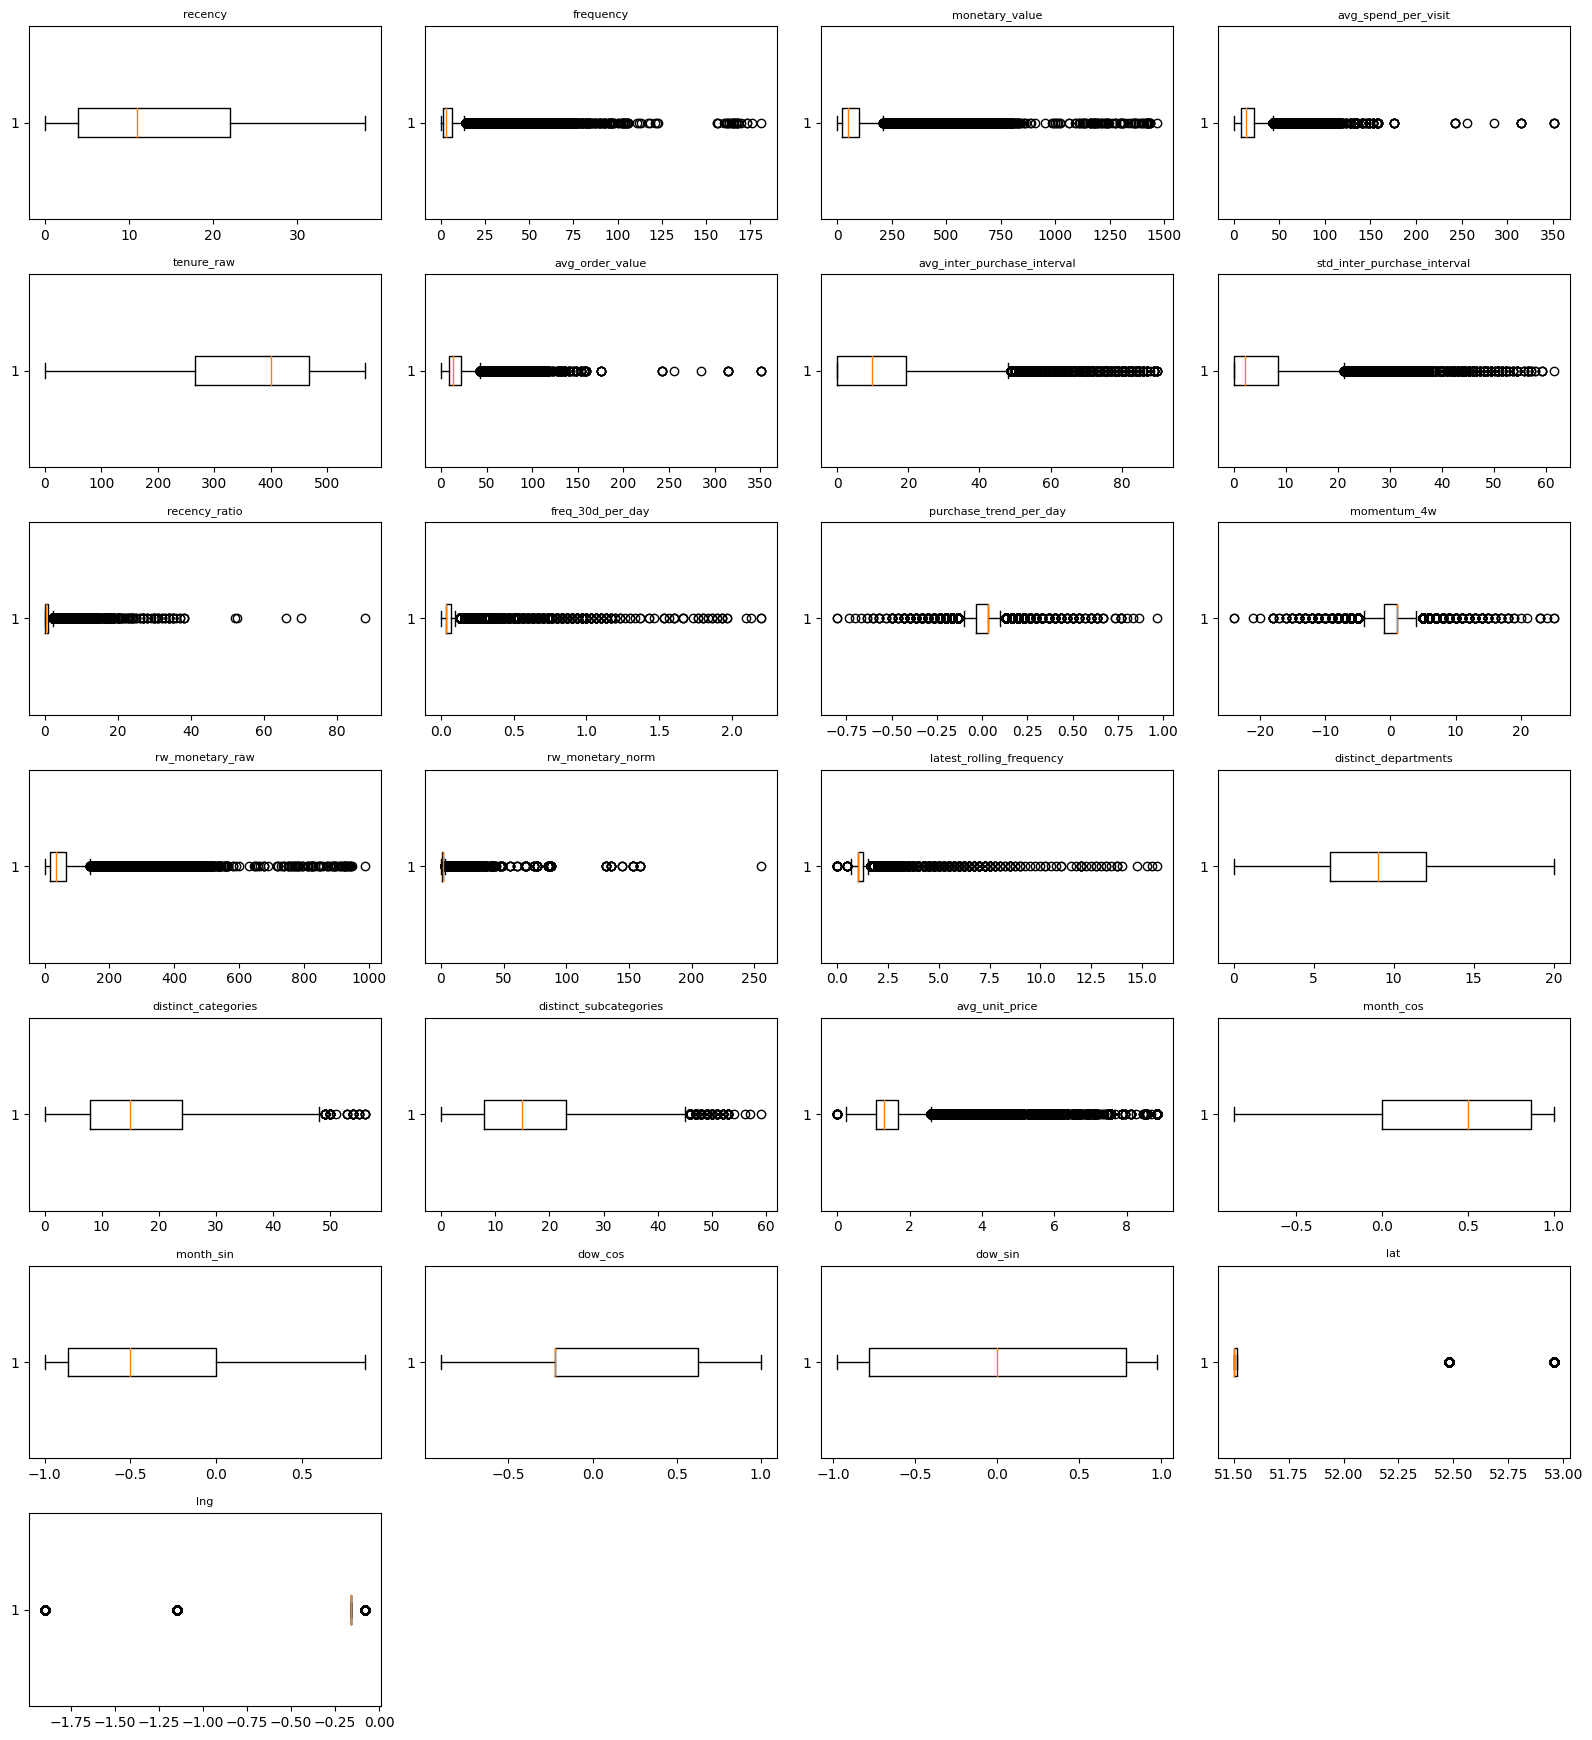

In [0]:
# Boxplots for Numeric Features
print("Boxplots: Numeric Features")
plot_boxplots(pdf, numeric_cols)

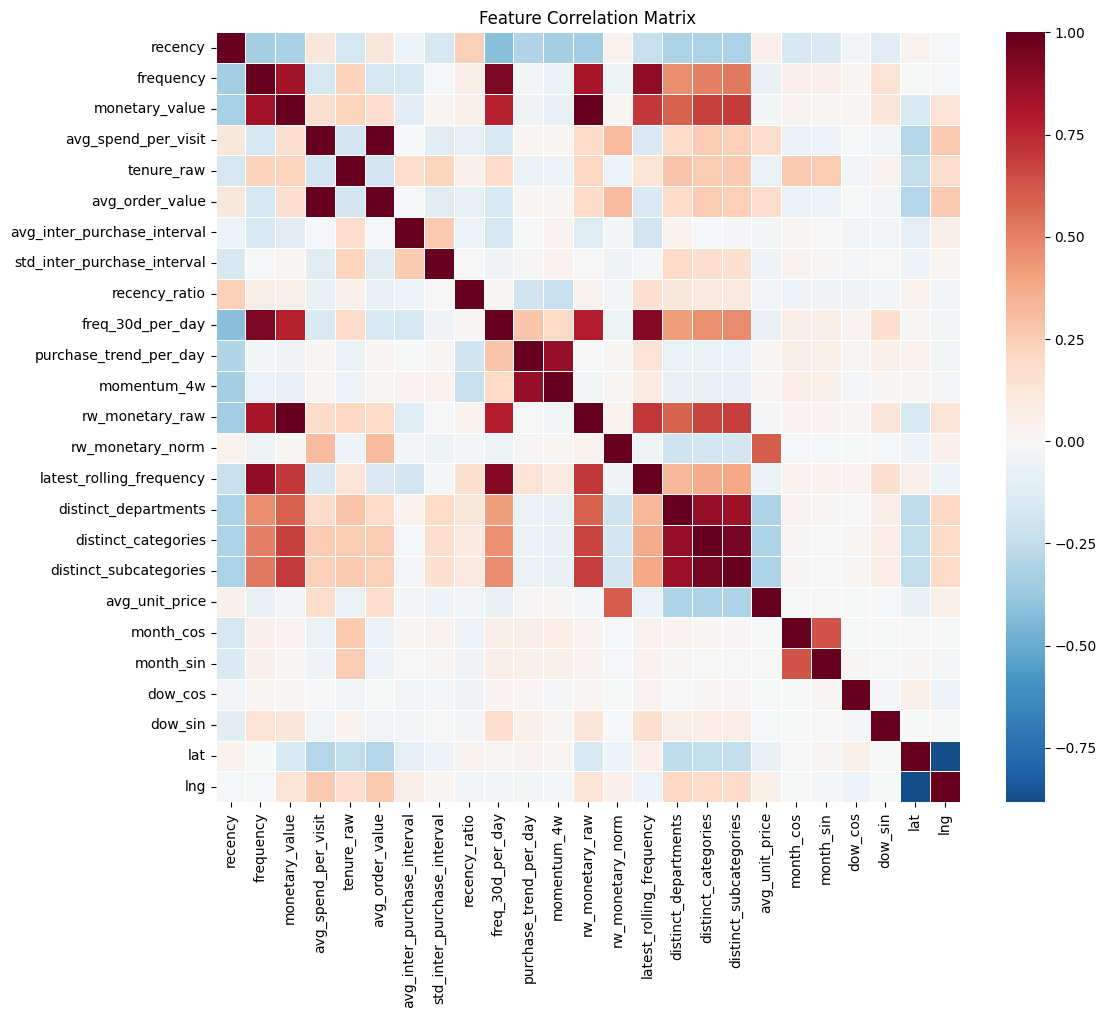

Highly Correlated Pairs (|r| > 0.8)
avg_spend_per_visit     avg_order_value             1.000000
monetary_value          rw_monetary_raw             0.994373
distinct_categories     distinct_subcategories      0.955134
frequency               freq_30d_per_day            0.936822
freq_30d_per_day        latest_rolling_frequency    0.905903
frequency               latest_rolling_frequency    0.888512
lat                     lng                         0.882894
distinct_departments    distinct_categories         0.878950
purchase_trend_per_day  momentum_4w                 0.875460
distinct_departments    distinct_subcategories      0.851515
frequency               monetary_value              0.832874
                        rw_monetary_raw             0.822443
dtype: float64 



In [0]:
# Correlation Analysis
# ---------------------

corr_matrix = pdf[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="RdBu_r", center=0, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Identify highly correlated pairs (|r| > 0.8)
abs_corr = corr_matrix.abs()
high_corr = (
    abs_corr.where(np.triu(np.ones(abs_corr.shape), k=1).astype(bool))
            .stack()
            .sort_values(ascending=False)
)
print("Highly Correlated Pairs (|r| > 0.8)")
print(high_corr[high_corr > 0.8], "\n")

In [0]:
# SELECT FINAL FEATURE LIST (AFTER DROPPING REDUNDANT / HIGHLY CORRELATED ONES)
# ------------------------------------------------------------------------------

selected_features = [
    # Core temporal/RFM features
    "recency",
    "avg_spend_per_visit",
    "rw_monetary_raw",
    "tenure_raw",

    # Interval-based and variability measures
    "avg_inter_purchase_interval",
    "std_inter_purchase_interval",
    "recency_ratio",

    # Purchase cadence and trend metrics
    "latest_rolling_frequency",
    "purchase_trend_per_day",

    # Behavioral diversity and product price features
    "distinct_subcategories",
    "avg_unit_price",

    # Seasonality features (cyclical encodings)
    "month_cos", "month_sin",
    "dow_cos", "dow_sin",

    # Location-based feature
    "lat",
]

# DETECT OUTLIERS AND ASSESS SKEWNESS FOR SELECTED FEATURES
# ----------------------------------------------------------

# Initialize containers for diagnostics
outlier_counts = {} # count of extreme values beyond 1.5*IQR
skewness_vals  = {} # measure of distribution asymmetry

# Loop through each selected feature
for col in selected_features:
    series = pdf[col].dropna()
    q1, q3 = series.quantile([0.25, 0.75])  # compute IQR boundaries
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

    # Count number of outliers beyond the whiskers
    outlier_counts[col] = int(((series < lower) | (series > upper)).sum())

    # Calculate skewness of the distribution
    skewness_vals[col] = float(skew(series))

# Convert to pandas Series and sort for inspection
outliers_series = pd.Series(outlier_counts).sort_values(ascending=False)
skew_series = pd.Series(skewness_vals).sort_values(ascending=False)

# Print summary diagnostics
print("Outliers per Feature:-")
print(outliers_series, "\n")

print("Skewness per Feature:-")
print(skew_series, "\n")

Outliers per Feature:-
lat                            9873
latest_rolling_frequency       5605
avg_spend_per_visit            3957
avg_unit_price                 3952
rw_monetary_raw                3936
recency_ratio                  3924
purchase_trend_per_day         3192
std_inter_purchase_interval    2910
avg_inter_purchase_interval    2561
distinct_subcategories          332
recency                           0
tenure_raw                        0
month_cos                         0
month_sin                         0
dow_cos                           0
dow_sin                           0
dtype: int64 

Skewness per Feature:-
recency_ratio                  12.894119
latest_rolling_frequency        6.721899
rw_monetary_raw                 4.437138
avg_unit_price                  4.156108
avg_spend_per_visit             3.709392
std_inter_purchase_interval     2.144368
lat                             1.774892
avg_inter_purchase_interval     1.744965
month_sin                       0.8

In [0]:
# Define special feature types

# Cyclical features: (sin/cos already normalized)
cyclic = ['month_cos', 'month_sin', 'dow_cos', 'dow_sin']

# Geolocation features
geo = ['lat']

# Define candidate numeric features
num_feats = [
    'recency',
    'avg_spend_per_visit',
    'rw_monetary_raw',
    'tenure_raw',
    'avg_inter_purchase_interval',
    'std_inter_purchase_interval',
    'recency_ratio',
    'latest_rolling_frequency',
    'purchase_trend_per_day',
    'distinct_subcategories',
    'avg_unit_price'
]

# Identify which features require winsorization + log1p (abs(skew) > 1)
skews = pdf[num_feats].skew().abs()
to_xform = [f for f, s in skews.items() if s > 1 and f not in (cyclic + geo)]
print("Features to winsorize & log1p:", to_xform, "\n")


# Build working DataFrame with ID, label, and all feature columns
final_df = pdf[['customer_id', 'ref_date', 'churn_flag'] + num_feats + cyclic + geo].copy()

# WINSORIZE & Log1p TRANSFORM HIGHLY SKEWED FEATURES
# ---------------------------------------------------

for col in to_xform:
    # Compute 1st and 99th percentiles for clipping
    lo, hi = final_df[col].quantile([0.01, 0.99])
    orig_min, orig_max, orig_mean = final_df[col].min(), final_df[col].max(), final_df[col].mean()

    print(f"---\nColumn: {col}")
    print(f"Original -> min: {orig_min:.4f}, max: {orig_max:.4f}, mean: {orig_mean:.4f}")
    print(f"Clipping bounds -> [{lo:.4f}, {hi:.4f}]")

    # Winsorize to handle extreme outliers
    clipped = final_df[col].clip(lower=lo, upper=hi)
    clipped_min, clipped_max, clipped_mean = clipped.min(), clipped.max(), clipped.mean()

    print(f"After clip -> min: {clipped_min:.4f}, max: {clipped_max:.4f}, mean: {clipped_mean:.4f}")

    # Safety check: ensure no negative values remain
    neg_count = int((clipped < 0).sum())
    if neg_count > 0:
        raise ValueError(
            f"After clipping, {neg_count} negative values remain in '{col}' "
            f"(lo={lo:.4f}, hi={hi:.4f}). Cannot log-transform negatives."
        )

    final_df[col] = clipped

    # Inspect sample values pre-log1p
    sample_pre = np.round(final_df[col].sample(5, random_state=42).values, 4)
    print("Sample pre-log1p:", sample_pre)

    # Apply log1p transformation to compress right tail
    final_df[col] = np.log1p(final_df[col])
    log_min, log_max, log_mean = final_df[col].min(), final_df[col].max(), final_df[col].mean()

    print(f"After log1p -> min: {log_min:.4f}, max: {log_max:.4f}, mean: {log_mean:.4f}")
    sample_post = np.round(final_df[col].sample(5, random_state=42).values, 4)
    print("Sample post-log1p:", sample_post, "\n")

# Preview transformed dataset
print("Final DataFrame preview:")
display(final_df.head())

Features to winsorize & log1p: ['avg_spend_per_visit', 'rw_monetary_raw', 'avg_inter_purchase_interval', 'std_inter_purchase_interval', 'recency_ratio', 'latest_rolling_frequency', 'avg_unit_price'] 

---
Column: avg_spend_per_visit
Original -> min: 0.0000, max: 350.5800, mean: 18.3105
Clipping bounds -> [2.1300, 80.0714]
After clip -> min: 2.1300, max: 80.0714, mean: 18.0629
Sample pre-log1p: [16.6583 24.7067 16.0211 18.0067 25.63  ]
After log1p -> min: 1.1410, max: 4.3953, mean: 2.7059
Sample post-log1p: [2.8712 3.2468 2.8345 2.9448 3.282 ] 

---
Column: rw_monetary_raw
Original -> min: 0.0000, max: 986.8879, mean: 54.6895
Clipping bounds -> [1.9849, 344.8369]
After clip -> min: 1.9849, max: 344.8369, mean: 53.2962
Sample pre-log1p: [111.7427  64.3869 101.7296  25.449   22.7318]
After log1p -> min: 1.0936, max: 5.8460, mean: 3.5209
Sample post-log1p: [4.7251 4.1803 4.6321 3.2752 3.1668] 

---
Column: avg_inter_purchase_interval
Original -> min: 0.0000, max: 90.0000, mean: 13.5975
Cli

,customer_id,ref_date,churn_flag,recency,avg_spend_per_visit,rw_monetary_raw,tenure_raw,avg_inter_purchase_interval,std_inter_purchase_interval,recency_ratio,latest_rolling_frequency,purchase_trend_per_day,distinct_subcategories,avg_unit_price,month_cos,month_sin,dow_cos,dow_sin,lat
0,5,2021-10-12,1,10,2.254707,3.109514,431,3.091042,0.000000,0.389465,0.693147,-0.033333,17,0.647552,5.000000e-01,-8.660254e-01,0.623490,-0.781831,51.499171
1,5,2021-12-07,0,3,2.161022,2.815125,487,3.761200,3.424213,0.068993,0.693147,0.033333,16,0.601799,1.000000e+00,-2.449294e-16,0.623490,-0.781831,51.499171
2,5,2021-12-14,0,10,2.079442,2.493444,494,4.158883,0.000000,0.147325,0.693147,0.033333,11,0.678245,1.000000e+00,-2.449294e-16,0.623490,-0.781831,51.499171
3,5,2022-01-11,0,17,2.252344,2.618359,522,3.091042,0.000000,0.593064,0.693147,0.000000,12,0.702107,1.000000e+00,-2.449294e-16,0.623490,-0.781831,51.499171
4,16,2021-09-07,0,0,2.387265,4.898589,404,1.223775,1.194581,0.000000,1.252763,0.133333,25,0.902832,-1.836970e-16,-1.000000e+00,-0.222521,0.974928,51.499171


In [0]:
# Check class balance on the final feature set
print("Raw churn_flag distribution")
counts = final_df["churn_flag"].value_counts()
percent = final_df["churn_flag"].value_counts(normalize=True) * 100
balance_report = pd.concat([counts, percent], axis=1, keys=("count", "percent"))
print(balance_report, "\n")

Raw churn_flag distribution
   count    percent
0  32660  59.803706
1  21952  40.196294 



In [0]:
# TEMPORAL HOLD-OUT SPLIT
# ------------------------

# Convert the reference date column to datetime for proper sorting and filtering
final_df['ref_date'] = pd.to_datetime(final_df['ref_date'])

# Extract sorted list of unique weekly reference dates
unique_dates = final_df['ref_date'].sort_values().unique()

# Ensure there are at least 3 weeks to support a 3-way temporal split
if len(unique_dates) < 3:
    raise ValueError("Need at least 3 distinct ref_date values for train/val/test split")

# Define temporal cutoffs: last date for test, second last for validation
test_date = unique_dates[-1]
val_date = unique_dates[-2]

# Create temporal splits: training = before val, val = val_date, test = test_date
mask = final_df['ref_date']
train_df = final_df[mask < val_date].copy()
val_df = final_df[mask == val_date].copy()
test_df = final_df[mask == test_date].copy()

# Verify no data leakage: all rows should be partitioned
assert len(train_df) + len(val_df) + len(test_df) == len(final_df), "Row counts mismatch!"

# Define metadata and feature columns
META_COLS = ['customer_id', 'ref_date', 'churn_flag']
feature_cols = [c for c in final_df.columns if c not in META_COLS]

# Standardize feature columns using training set statistics
scaler = StandardScaler().fit(train_df[feature_cols])
for df in (train_df, val_df, test_df):
    df[feature_cols] = scaler.transform(df[feature_cols])

# Extract input features (X) and target labels (y)
X_train, y_train = train_df[feature_cols], train_df['churn_flag']
X_val, y_val = val_df[feature_cols], val_df['churn_flag']
X_test, y_test = test_df[feature_cols], test_df['churn_flag']

# Print summary of split sizes and their date ranges
print(f"Train set: {len(X_train)} rows | dates {train_df['ref_date'].dt.date.min()} -> {train_df['ref_date'].dt.date.max()}")
print(f"Validation: {len(X_val)} rows | date {val_df['ref_date'].dt.date.iloc[0]}")
print(f"Test set: {len(X_test)} rows | date {test_df['ref_date'].dt.date.iloc[0]}\n")

# Report churn distribution in each split for balance checking
for name, df in [('Train', train_df), ('Validation', val_df), ('Test', test_df)]:
    pct = df['churn_flag'].value_counts(normalize=True) * 100
    print(f"{name} churn% -> 0: {pct.loc[0]:.1f}%, 1: {pct.loc[1]:.1f}%")

# Print scaler diagnostics to verify that training features are standardized
print("\nTraining feature means (≈0):")
print(train_df[feature_cols].mean().round(4).to_string(), "\n")

print("Training feature stds (≈1):")
print(train_df[feature_cols].std().round(4).to_string())

Train set: 50379 rows | dates 2021-08-17 -> 2022-01-25
Validation: 2117 rows | date 2022-02-01
Test set: 2116 rows | date 2022-02-08

Train churn% -> 0: 59.7%, 1: 40.3%
Validation churn% -> 0: 60.9%, 1: 39.1%
Test churn% -> 0: 60.9%, 1: 39.1%

Training feature means (≈0):
recency                        0.0
avg_spend_per_visit            0.0
rw_monetary_raw               -0.0
tenure_raw                     0.0
avg_inter_purchase_interval    0.0
std_inter_purchase_interval    0.0
recency_ratio                 -0.0
latest_rolling_frequency       0.0
purchase_trend_per_day        -0.0
distinct_subcategories         0.0
avg_unit_price                -0.0
month_cos                      0.0
month_sin                     -0.0
dow_cos                        0.0
dow_sin                        0.0
lat                           -0.0 

Training feature stds (≈1):
recency                        1.0
avg_spend_per_visit            1.0
rw_monetary_raw                1.0
tenure_raw                     1

In [0]:
# Pre-compute class weights
classes = np.unique(y_train)
cw_dict = dict(zip(classes, compute_class_weight("balanced", classes=classes, y=y_train)))
print("Class weights:", cw_dict, "\n")

Class weights: {0: 0.8373890495661713, 1: 1.2409843334318653} 



In [0]:
# LOGISTIC REGRESSION MODEL TRAINING & EVALUATION
# ------------------------------------------------

print("Tuning Logistic Regression on validation set")

# Dictionary to store validation AUC for each regularization strength
lr_scores = {}

# Tune hyperparameter C (inverse of regularization strength)
for C in [0.01, 0.1, 1, 10]:
    lr = LogisticRegression(
        C=C,
        solver="lbfgs",
        max_iter=2000,
        class_weight="balanced", # handle imbalance via class weighting
        random_state=42
    )
    lr.fit(X_train, y_train)                     # train on training set
    val_proba = lr.predict_proba(X_val)[:, 1]    # get churn probabilities
    auc = roc_auc_score(y_val, val_proba)        # evaluate with ROC-AUC
    print(f"  C={C:<5} -> Val ROC-AUC = {auc:.4f}")
    lr_scores[C] = auc                           # store AUC for this C

# Select simplest C within ε of the best performing AUC
ε = 1e-4
best_auc = max(lr_scores.values())
best_C = min([C for C, auc in lr_scores.items() if auc >= best_auc - ε])
print(f"\n Best Logistic C = {best_C}, Val AUC = {lr_scores[best_C]:.4f}\n")

# Retrain Logistic Regression on combined training + validation data
lr_final = LogisticRegression(
    C=best_C,
    solver="lbfgs",
    max_iter=2000,
    class_weight="balanced",
    random_state=42
)
lr_final.fit(
    pd.concat([X_train, X_val], axis=0),
    pd.concat([y_train, y_val], axis=0)
)

# Evaluate on hold-out test set
lr_test_proba = lr_final.predict_proba(X_test)[:, 1]  # churn probabilities
print("Logistic Regression: Test Performance")
print(f"Test ROC-AUC = {roc_auc_score(y_test, lr_test_proba):.4f}")  # ROC-AUC

# Classification metrics
print(classification_report(y_test, lr_final.predict(X_test), digits=4))

Tuning Logistic Regression on validation set
  C=0.01  -> Val ROC-AUC = 0.8509
  C=0.1   -> Val ROC-AUC = 0.8511
  C=1     -> Val ROC-AUC = 0.8511
  C=10    -> Val ROC-AUC = 0.8511

 Best Logistic C = 0.1, Val AUC = 0.8511

Logistic Regression: Test Performance
Test ROC-AUC = 0.8564
              precision    recall  f1-score   support

           0     0.8491    0.7595    0.8018      1289
           1     0.6781    0.7896    0.7296       827

    accuracy                         0.7713      2116
   macro avg     0.7636    0.7746    0.7657      2116
weighted avg     0.7823    0.7713    0.7736      2116



In [0]:
# RANDOM FOREST MODEL TRAINING & EVALUATION
# ------------------------------------------

print("Tuning Random Forest on validation set")

# List to collect validation AUC and hyperparameters
rf_results = []

# Grid search over number of trees and tree depth
for n_est in [100, 200]:
    for depth in [None, 10, 20]:
        rf = RandomForestClassifier(
            n_estimators=n_est,
            max_depth=depth,
            class_weight=cw_dict,   # handle imbalance using precomputed class weights
            oob_score=True,         # enable out-of-bag validation (only for training diagnostics)
            random_state=42,
            n_jobs=-1               # use all available CPU cores
        )
        rf.fit(X_train, y_train)                         # train model
        val_proba = rf.predict_proba(X_val)[:, 1]        # predict churn probabilities
        auc = roc_auc_score(y_val, val_proba)            # calculate AUC on validation set
        oob = rf.oob_score_                              # OOB score (informal check)
        print(f" n={n_est:<3} depth={str(depth):<4} -> Val AUC = {auc:.4f}  (OOB={oob:.4f})")
        rf_results.append((auc, n_est, depth))           # store results

# Select simplest model within ε of best AUC
top_auc = max(r[0] for r in rf_results)
cands = [r for r in rf_results if r[0] >= top_auc - ε]
cands.sort(key=lambda x: (x[1], x[2] if x[2] is not None else float("inf")))
_, best_n, best_depth = cands[0]

print(f"\n Best RF = n_estimators={best_n}, max_depth={best_depth}, Val AUC={top_auc:.4f}\n")

# Retrain final RF model on train + validation data
rf_final = RandomForestClassifier(
    n_estimators=best_n,
    max_depth=best_depth,
    class_weight=cw_dict,
    random_state=42,
    n_jobs=-1
)
rf_final.fit(
    pd.concat([X_train, X_val], axis=0),
    pd.concat([y_train, y_val], axis=0)
)

# Evaluate final RF on test set
rf_test_proba = rf_final.predict_proba(X_test)[:, 1]  # churn probabilities
rf_test_pred = rf_final.predict(X_test)               # predicted labels (default threshold = 0.5)

print("Random Forest: Test Performance")
print(f"Test ROC-AUC = {roc_auc_score(y_test, rf_test_proba):.4f}")
print(classification_report(y_test, rf_test_pred, digits=4))

Tuning Random Forest on validation set
 n=100 depth=None -> Val AUC = 0.9240  (OOB=0.8988)
 n=100 depth=10   -> Val AUC = 0.8713  (OOB=0.7915)
 n=100 depth=20   -> Val AUC = 0.9197  (OOB=0.8888)
 n=200 depth=None -> Val AUC = 0.9262  (OOB=0.9020)
 n=200 depth=10   -> Val AUC = 0.8722  (OOB=0.7921)
 n=200 depth=20   -> Val AUC = 0.9216  (OOB=0.8916)

 Best RF = n_estimators=200, max_depth=None, Val AUC=0.9262

Random Forest: Test Performance
Test ROC-AUC = 0.9411
              precision    recall  f1-score   support

           0     0.8744    0.9240    0.8985      1289
           1     0.8700    0.7932    0.8299       827

    accuracy                         0.8729      2116
   macro avg     0.8722    0.8586    0.8642      2116
weighted avg     0.8727    0.8729    0.8717      2116



In [0]:
# XGBOOST MODEL TRAINING & EVALUATION
# ------------------------------------

# Compute imbalance ratio for class weighting
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos_weight = neg / pos
print(f"\nXGBoost scale_pos_weight = {scale_pos_weight:.2f}\n")

# Hyperparameter tuning on validation set
xgb_results = []
print("Tuning XGBoost on validation set")
for n_est in [100, 200]:          # number of trees
    for depth in [3, 5]:          # tree depth
        for eta in [0.05, 0.1]:   # learning rate
            xgb = XGBClassifier(
                n_estimators=n_est,
                max_depth=depth,
                learning_rate=eta,
                use_label_encoder=False,
                eval_metric="auc",
                scale_pos_weight=scale_pos_weight,  # handle imbalance
                random_state=42,
                n_jobs=-1,
                early_stopping_rounds=20
            )
            xgb.fit(
                X_train, y_train,
                eval_set=[(X_val, y_val)],
                verbose=False
            )
            val_proba = xgb.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, val_proba)
            print(f" n={n_est:<3} depth={depth:<2} η={eta:<4} -> Val AUC = {auc:.4f}")
            xgb_results.append((auc, n_est, depth, eta))

# Choose most parsimonious model within ε of best AUC
top_auc = max(r[0] for r in xgb_results)
cands = [r for r in xgb_results if r[0] >= top_auc - ε]
cands.sort(key=lambda x: (x[1], x[2], -x[3]))  # prefer fewer trees, shallower depth
_, best_n, best_depth, best_eta = cands[0]

print(f"\n Best XGB = n_estimators={best_n}, max_depth={best_depth}, η={best_eta}, Val AUC={top_auc:.4f}\n")

# Retrain on full train + validation set (no early stopping)
xgb_final = XGBClassifier(
    n_estimators=best_n,
    max_depth=best_depth,
    learning_rate=best_eta,
    use_label_encoder=False,
    eval_metric="auc",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)
xgb_final.fit(
    pd.concat([X_train, X_val], axis=0),
    pd.concat([y_train, y_val], axis=0),
    verbose=False
)

# Evaluate final XGBoost model on test set
xgb_test_proba = xgb_final.predict_proba(X_test)[:, 1]
xgb_test_pred  = xgb_final.predict(X_test)

print("XGBoost: Test Performance")
print(f"Test ROC-AUC = {roc_auc_score(y_test, xgb_test_proba):.4f}")
print(classification_report(y_test, xgb_test_pred, digits=4))


XGBoost scale_pos_weight = 1.48

Tuning XGBoost on validation set
 n=100 depth=3  η=0.05 -> Val AUC = 0.8493
 n=100 depth=3  η=0.1  -> Val AUC = 0.8513
 n=100 depth=5  η=0.05 -> Val AUC = 0.8563
 n=100 depth=5  η=0.1  -> Val AUC = 0.8602
 n=200 depth=3  η=0.05 -> Val AUC = 0.8493
 n=200 depth=3  η=0.1  -> Val AUC = 0.8536
 n=200 depth=5  η=0.05 -> Val AUC = 0.8605
 n=200 depth=5  η=0.1  -> Val AUC = 0.8698

 Best XGB = n_estimators=200, max_depth=5, η=0.1, Val AUC=0.8698

XGBoost: Test Performance
Test ROC-AUC = 0.8796
              precision    recall  f1-score   support

           0     0.8580    0.8061    0.8312      1289
           1     0.7238    0.7920    0.7564       827

    accuracy                         0.8006      2116
   macro avg     0.7909    0.7990    0.7938      2116
weighted avg     0.8055    0.8006    0.8019      2116



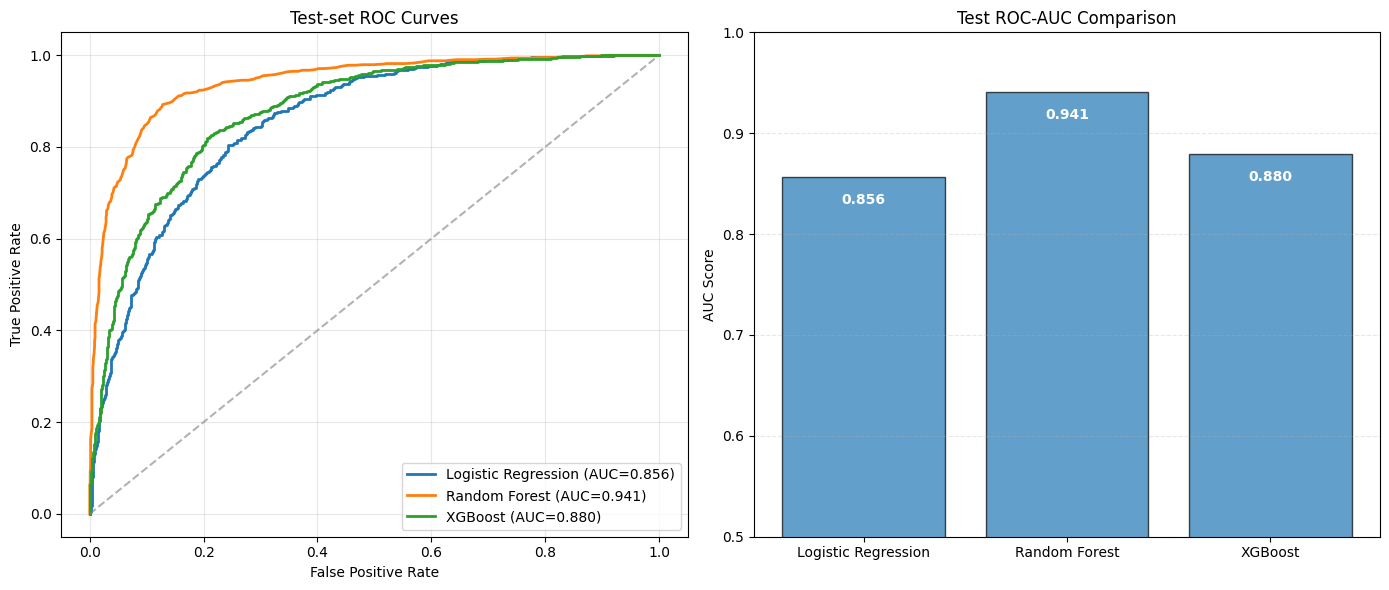

In [0]:
# ROC & AUC COMPARISON ACROSS MODELS
# -----------------------------------

# Prepare model list
models = [
    ("Logistic Regression", lr_final),
    ("Random Forest", rf_final),
    ("XGBoost", xgb_final),
]

# Create figure with two side-by-side subplots
fig, (ax_roc, ax_bar) = plt.subplots(1, 2, figsize=(14, 6))

# ROC Curves
# -----------

for name, model in models:
    # Get predicted probabilities for the positive class
    proba = model.predict_proba(X_test)[:, 1]
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc_score = roc_auc_score(y_test, proba)
    # Plot
    ax_roc.plot(fpr, tpr, lw=2, label=f"{name} (AUC={auc_score:.3f})")

# Diagonal reference for random guessing
ax_roc.plot([0, 1], [0, 1], linestyle="--", color="gray", alpha=0.6)

# Labels & styling
ax_roc.set_title("Test‐set ROC Curves")
ax_roc.set_xlabel("False Positive Rate")
ax_roc.set_ylabel("True Positive Rate")
ax_roc.legend(loc="lower right")
ax_roc.grid(alpha=0.3)

# AUC Bar Chart
# --------------

# Collect AUC scores in the same order
auc_scores = [roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) for _, model in models]
names = [name for name, _ in models]

bars = ax_bar.bar(names, auc_scores, edgecolor="k", alpha=0.7)
ax_bar.set_title("Test ROC‐AUC Comparison")
ax_bar.set_ylabel("AUC Score")
ax_bar.set_ylim(0.50, 1.00)
ax_bar.grid(axis="y", linestyle="--", alpha=0.3)

# Annotate each bar with its value
for bar, score in zip(bars, auc_scores):
    height = bar.get_height()
    ax_bar.text(
        bar.get_x() + bar.get_width()/2,
        height - 0.03,
        f"{score:.3f}",
        ha="center",
        va="bottom",
        color="white",
        fontweight="bold"
    )

plt.tight_layout()
plt.show()

In [0]:
# TEST‐SET EVALUATION & CHAMPION SELECTION
# -----------------------------------------

# Compute predicted probabilities on the held‐out test set
lr_proba = lr_final.predict_proba(X_test)[:, 1]
rf_proba = rf_final.predict_proba(X_test)[:, 1]
xgb_proba = xgb_final.predict_proba(X_test)[:, 1]

# Calculate ROC‐AUC for each model
test_aucs = {
    "Logistic Regression": roc_auc_score(y_test, lr_proba),
    "Random Forest": roc_auc_score(y_test, rf_proba),
    "XGBoost": roc_auc_score(y_test, xgb_proba),
}
print("\nTest AUCs:", test_aucs)

# Identify the best model (highest AUC)
champion_name  = max(test_aucs, key=test_aucs.get)
champion_model = {
    "Logistic Regression": lr_final,
    "Random Forest": rf_final,
    "XGBoost": xgb_final
}[champion_name]
champion_proba = {
    "Logistic Regression": lr_proba,
    "Random Forest": rf_proba,
    "XGBoost": xgb_proba
}[champion_name]

# Determine the optimal F₁‐threshold

# precision_recall_curve returns precision, recall, and corresponding thresholds
# F₁ = 2·(precision·recall)/(precision+recall)

precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, champion_proba)
f1_scores = 2 * (precision_vals * recall_vals) / (precision_vals + recall_vals)

# Exclude the last entry (threshold array is one element shorter than precision/recall)
best_idx = np.nanargmax(f1_scores)
best_thresh = thresholds[best_idx]

print(f"\n Champion: {champion_name} (AUC={test_aucs[champion_name]:.4f})")
print(f" Best F₁ = {f1_scores[best_idx]:.4f} at threshold = {best_thresh:.4f}")


Test AUCs: {'Logistic Regression': 0.8563906480563374, 'Random Forest': 0.9411038242856727, 'XGBoost': 0.8795697573083754}

 Champion: Random Forest (AUC=0.9411)
 Best F₁ = 0.8532 at threshold = 0.3900


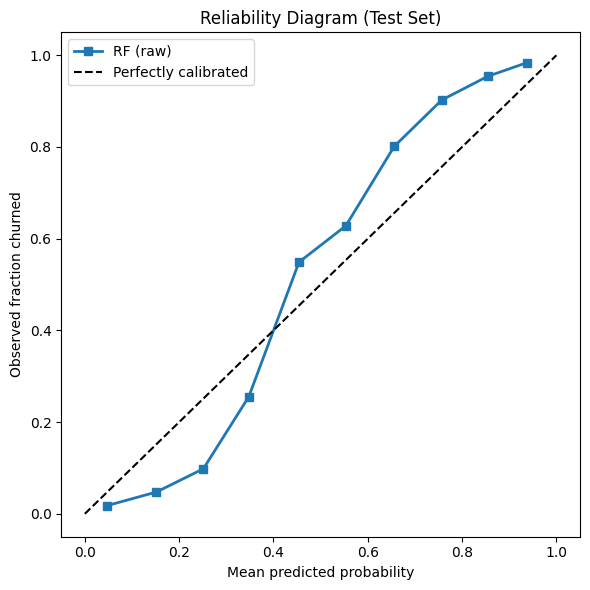

In [0]:
# CALIBRATION & SEGMENTATION
# ---------------------------

# Reliability Diagram (Calibration Curve)

# Compute predicted probabilities from the champion model on the test set
y_proba_raw = champion_model.predict_proba(X_test)[:, 1]

# Group predictions into bins and calculate:
# raw_pred: average predicted probability in each bin
# raw_true: observed fraction of churns in each bin
# This allows visual assessment of calibration quality.
raw_true, raw_pred = calibration_curve(
    y_test,
    y_proba_raw,
    n_bins=10,
    strategy="uniform"
)

# Plot Calibration Curve
plt.figure(figsize=(6, 6))

# Plot the observed fraction vs. predicted probability
plt.plot(raw_pred, raw_true, marker="s", lw=2, label="RF (raw)")

# Plot the diagonal reference line (perfect calibration)
plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")

# Set labels and title
plt.xlabel("Mean predicted probability")
plt.ylabel("Observed fraction churned")
plt.title("Reliability Diagram (Test Set)")

# Show legend and finalize layout
plt.legend()
plt.tight_layout()
plt.show()

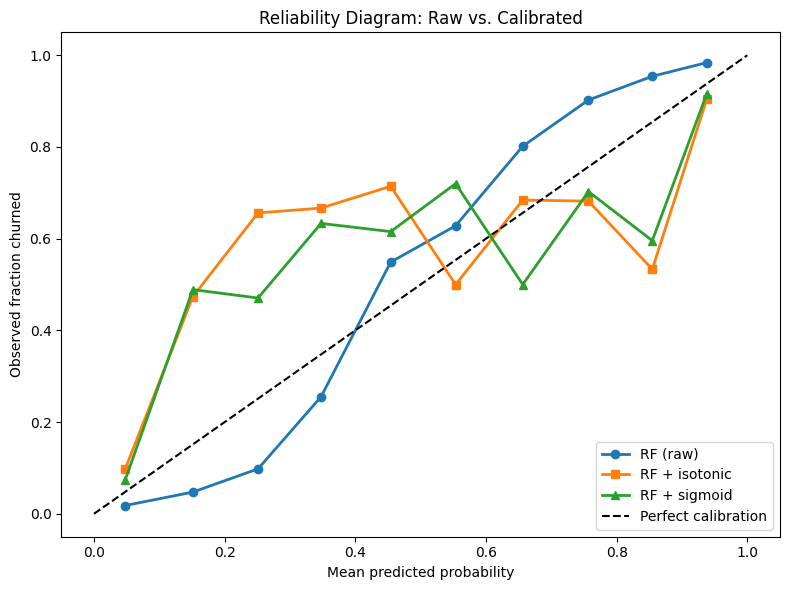

In [0]:
# PROBABILITY CALIBRATION
# ------------------------

# Calibrate the champion model using held-out validation set

# Isotonic and Sigmoid (Platt scaling) calibration applied to the already-fitted model
# Note: cv="prefit" ensures the model is not retrained, only the calibration function is fit

iso_cal = CalibratedClassifierCV(
    estimator=champion_model,
    method="isotonic",
    cv="prefit"
)

sig_cal = CalibratedClassifierCV(
    estimator=champion_model,
    method="sigmoid",
    cv="prefit"
)

# Fit both calibration methods using validation set
iso_cal.fit(X_val, y_val)
sig_cal.fit(X_val, y_val)


# Predict calibrated probabilities on the test set
y_proba_iso = iso_cal.predict_proba(X_test)[:, 1]
y_proba_sig = sig_cal.predict_proba(X_test)[:, 1]

# Compute calibration curves using the same binning (for alignment)
# These reflect the observed churn rate vs predicted probabilities
iso_true, _ = calibration_curve(y_test, y_proba_iso, n_bins=10, strategy="uniform")
sig_true, _ = calibration_curve(y_test, y_proba_sig, n_bins=10, strategy="uniform")

# Plot reliability diagram comparing raw, isotonic, and sigmoid
plt.figure(figsize=(8, 6))

# Original uncalibrated curve
plt.plot(raw_pred, raw_true, "o-", label="RF (raw)", lw=2)

# Isotonic-calibrated probabilities
plt.plot(raw_pred, iso_true, "s-", label="RF + isotonic", lw=2)

# Sigmoid-calibrated probabilities
plt.plot(raw_pred, sig_true, "^-", label="RF + sigmoid", lw=2)

# Perfect calibration reference line
plt.plot([0, 1], [0, 1], "k--", label="Perfect calibration")

# Final plot adjustments
plt.xlabel("Mean predicted probability")
plt.ylabel("Observed fraction churned")
plt.title("Reliability Diagram: Raw vs. Calibrated")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

,avg_proba,obs_churn_rt,count,obs_churn_pct
risk_decile,,,,
1,0.916,0.976,212,97.6%
2,0.815,0.923,208,92.3%
3,0.688,0.850,213,85.0%
4,0.519,0.612,209,61.2%
5,0.367,0.299,214,29.9%
6,0.271,0.130,200,13.0%
7,0.194,0.060,218,6.0%
8,0.128,0.037,218,3.7%
9,0.074,0.025,200,2.5%


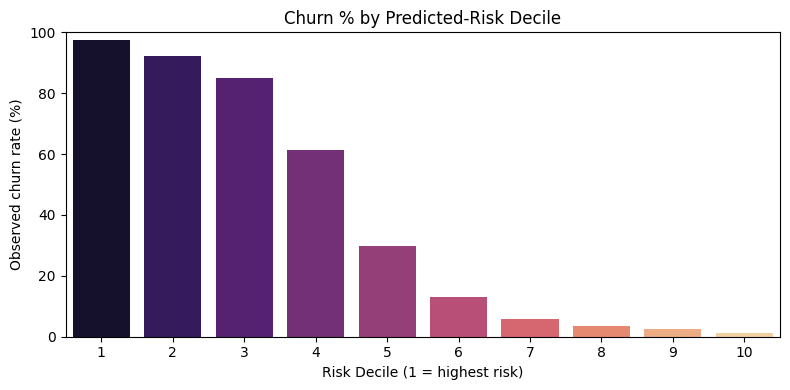

In [0]:
# DECILE / RISK-BUCKET ANALYSIS
# ------------------------------

# Construct DataFrame with test IDs, true labels, and predicted probabilities
df_test = pd.DataFrame({
    "customer_id": test_df["customer_id"],
    "ref_date": test_df["ref_date"],
    "y_true": y_test,
    "y_proba": y_proba_raw
})

# Assign risk deciles (1 = highest risk)

# Use qcut to split probabilities into 10 equal-sized buckets
# Reversed so decile 1 means highest predicted risk
df_test["risk_decile"] = 11 - pd.qcut(
    df_test["y_proba"],
    q=10,
    labels=range(1, 11)
).astype(int)

# Aggregate stats per decile
# Includes average predicted proba, actual churn rate, and number of customers
decile_stats = (
    df_test
    .groupby("risk_decile")
    .agg(
        avg_proba = ("y_proba", "mean"),
        obs_churn_rt = ("y_true",  "mean"),
        count = ("y_true",  "size")
    )
    .sort_index()
)

# Add churn % column
decile_stats["obs_churn_pct"] = 100 * decile_stats["obs_churn_rt"]

# Display decile summary table
display(
    decile_stats.style.format({
        "avg_proba": "{:.3f}",
        "obs_churn_rt": "{:.3f}",
        "obs_churn_pct":"{:.1f}%"
    })
)

# Plot observed churn % by predicted-risk decile
plt.figure(figsize=(8, 4))
sns.barplot(
    x=decile_stats.index.astype(str),
    y=decile_stats["obs_churn_pct"],
    palette="magma"
)
plt.xlabel("Risk Decile (1 = highest risk)")
plt.ylabel("Observed churn rate (%)")
plt.title("Churn % by Predicted-Risk Decile")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [0]:
# Brier Score Evaluation for Calibration
# ---------------------------------------
# Brier score measures the mean squared error between predicted probabilities 
# and the actual 0/1 outcomes. Lower values indicate better calibrated probabilities.

# Compute Brier scores for raw, isotonic, and sigmoid-calibrated models
brier_raw = brier_score_loss(y_test, y_proba_raw)
brier_iso = brier_score_loss(y_test, y_proba_iso)
brier_sig = brier_score_loss(y_test, y_proba_sig)

# Display Brier scores
print("Brier scores:")
print(f"  RF (raw)      = {brier_raw:.4f}")
print(f"  RF + isotonic = {brier_iso:.4f}")
print(f"  RF + sigmoid  = {brier_sig:.4f}\n")

# Determine which calibration method produced the lowest Brier score
brier_dict = {
    "raw": brier_raw,
    "isotonic": brier_iso,
    "sigmoid": brier_sig
}
best_cal = min(brier_dict, key=brier_dict.get)

# Display the best-performing calibration method
print(f"Best calibration method: {best_cal}")

Brier scores:
  RF (raw)      = 0.0997
  RF + isotonic = 0.1120
  RF + sigmoid  = 0.1010

Best calibration method: raw


Test-set pred_churn counts:
0    1213
1     903
Name: pred_churn, dtype: int64 

Confusion Matrix:
[[1124  165]
 [  89  738]] 

Classification Report:
              precision    recall  f1-score   support

           0     0.9266    0.8720    0.8985      1289
           1     0.8173    0.8924    0.8532       827

    accuracy                         0.8800      2116
   macro avg     0.8720    0.8822    0.8758      2116
weighted avg     0.8839    0.8800    0.8808      2116



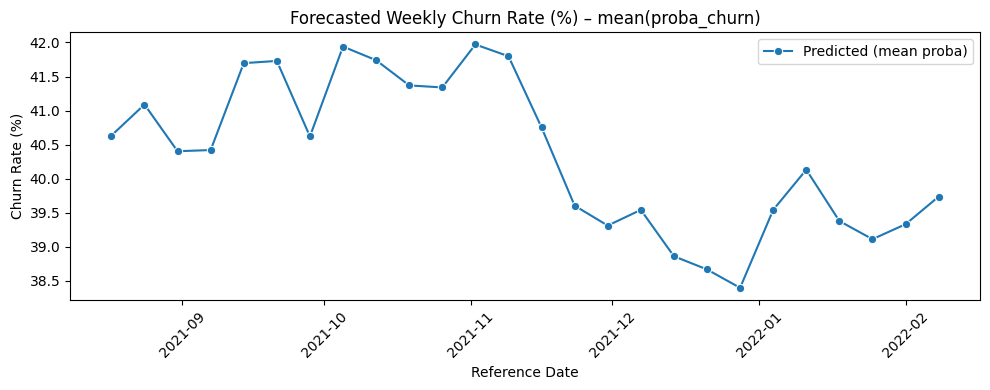

In [0]:
# CORE CHURN PROBABILITY COMPUTATION
# -----------------------------------
def compute_churn_proba(
    df: pd.DataFrame,
    feature_cols: list = feature_cols,
    model=None
) -> np.ndarray:
    """
    Compute the raw churn probabilities using the champion model.
    Parameters:
        df : Input DataFrame with feature columns.
        feature_cols : List of feature column names used for prediction.
        model : Trained model with a .predict_proba method. Defaults to global champion_model.
    Returns:
        Numpy array of predicted churn probabilities.
    """
    model = champion_model if model is None else model

    # Check if all required features are present
    missing = set(feature_cols) - set(df.columns)
    if missing:
        raise KeyError(f"Missing feature columns: {missing}")

    # Extract features and compute probabilities
    Xf = df[feature_cols]
    return model.predict_proba(Xf)[:, 1]  # Probability of class 1 (churn)

# Wrapper 1: Add churn probability column
# ----------------------------------------
def predict_churn_proba(
    df: pd.DataFrame,
    feature_cols: list = feature_cols,
    model=None
) -> pd.DataFrame:
    """
    Add churn probability column to DataFrame.
    Returns a copy of the input with:
    - 'proba_churn': predicted probability of churn
    """
    out = df.copy()
    out["proba_churn"] = compute_churn_proba(out, feature_cols, model)
    return out


# Wrapper 2: Add binary churn prediction at F1-optimized threshold
# -----------------------------------------------------------------
def predict_churn_flags(
    df: pd.DataFrame,
    threshold: float = None,
    feature_cols: list = feature_cols,
    model=None
) -> pd.DataFrame:
    """
    Add binary churn prediction column using the F1-optimized threshold.
    Returns a copy of the input with:
    - 'proba_churn': predicted probability of churn
    - 'pred_churn' : binary churn prediction (1 = churn)
    """
    thresh = best_thresh if threshold is None else threshold
    out = predict_churn_proba(df, feature_cols, model)
    out["pred_churn"] = (out["proba_churn"] >= thresh).astype(int)
    return out


# Test Set Predictions
# ---------------------
test_preds = predict_churn_flags(test_df)

print("Test-set pred_churn counts:")
print(test_preds["pred_churn"].value_counts(), "\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, test_preds["pred_churn"]), "\n")

print("Classification Report:")
print(classification_report(y_test, test_preds["pred_churn"], digits=4))


# Weekly Churn Rate Forecast using Mean Probability
# --------------------------------------------------

# Scale full dataset before applying helper
final_scaled = final_df.copy()
final_scaled[feature_cols] = scaler.transform(final_scaled[feature_cols])

# Compute weekly average churn probability
weekly_proba = (
    predict_churn_proba(final_scaled)
    .groupby("ref_date")["proba_churn"]
    .mean()
    .mul(100)
    .reset_index(name="pred_churn_pct")
)

# Plot churn rate over time
plt.figure(figsize=(10, 4))
sns.lineplot(
    data=weekly_proba,
    x="ref_date",
    y="pred_churn_pct",
    marker="o",
    label="Predicted (mean proba)"
)
plt.title("Forecasted Weekly Churn Rate (%) – mean(proba_churn)")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Reference Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

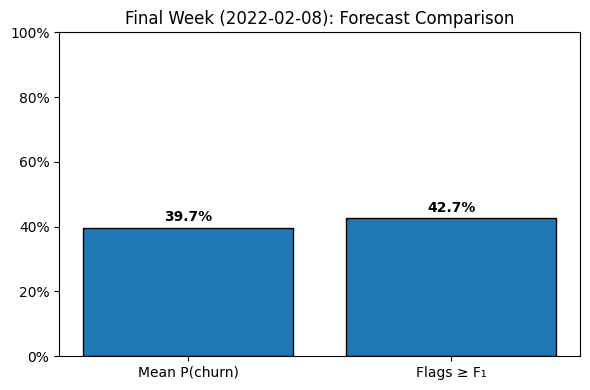

In [0]:
# FINAL WEEK FORECAST COMPARISON: Mean Probability vs F₁-Threshold Flags
# -----------------------------------------------------------------------

# Identify the final reference week as a pandas Timestamp
final_week = pd.to_datetime(unique_dates[-1])

# Select only that week's data (features already scaled in final_scaled)
week_df = final_scaled[final_scaled["ref_date"] == final_week]

# Compute average churn probability (unbiased rate forecast)
proba_df = predict_churn_proba(week_df)
mean_proba = proba_df["proba_churn"].mean()  # e.g., 0.3974 → 39.7%

# Compute fraction flagged at the F₁-optimized threshold
flags_df = predict_churn_flags(week_df)
flag_pct = flags_df["pred_churn"].mean()

plt.figure(figsize=(6, 4))
bars = plt.bar(
    ["Mean P(churn)", "Flags ≥ F₁"],
    [mean_proba, flag_pct],
    edgecolor="k"
)

# Format y-axis as percentage and set range
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.ylim(0, 1)
plt.title(f"Final Week ({final_week.date()}): Forecast Comparison")

# Annotate each bar with percentage value
for bar, val in zip(bars, [mean_proba, flag_pct]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        val + 0.02,
        f"{100 * val:.1f}%",
        ha="center",
        fontweight="bold"
    )
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------------------
# Rationale:
# -> "Mean P(churn)" provides an unbiased point forecast of churn rate by
#     averaging raw predicted probabilities.
# -> "Flags ≥ F₁" shows the share of customers exceeding the F₁-optimized
#     threshold—i.e., those who would be included in a call or intervention list.

100%|██████████| 24/24 [01:24<00:00,  3.52s/it]


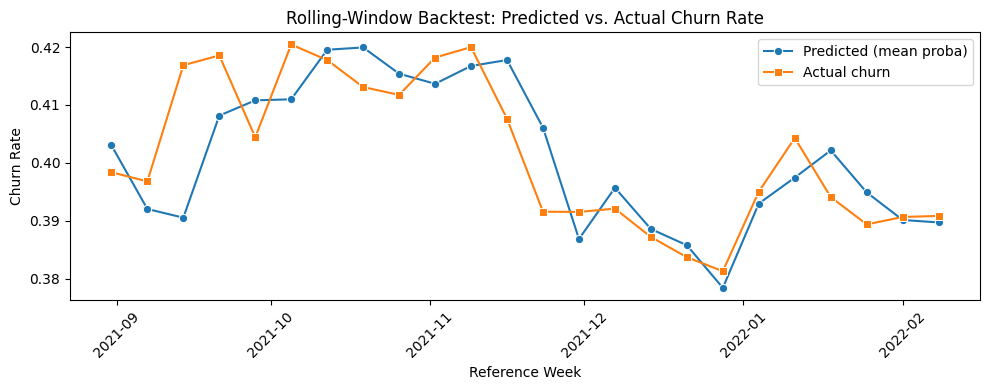

Mean error: -0.0003
Pearson r : 0.7853


In [0]:
# ROLLING-WINDOW BACKTEST with Platt (Sigmoid) Calibration
# ---------------------------------------------------------

# Even though the global helper uses raw RF probabilities (best Brier score overall),
# here Platt scaling is applied on each rolling fold to guard against temporal drift
# and to ensure unbiased probability forecasts in production.

# Reuse locked-in RF hyperparameters
rf_bt_params = {
    "n_estimators": best_n,
    "max_depth": best_depth,
    "class_weight": cw_dict,
    "random_state": 42,
    "n_jobs": -1
}
backtest = []
unique_dates = sorted(final_df['ref_date'].unique())

# For each week after the first calibration week,
# the prior week is used purely for calibration (no leakage),
# then evaluates on the current week.
for i in tqdm(range(2, len(unique_dates))):
    calib_week = unique_dates[i-1]   # only for calibration
    test_week = unique_dates[i]      # week to evaluate

    # Split by date for this fold
    train_bt = final_df[final_df['ref_date'] < calib_week]
    calib_bt = final_df[final_df['ref_date'] == calib_week]
    test_bt = final_df[final_df['ref_date'] == test_week]

    # Scale features using train only
    scaler_bt = StandardScaler().fit(train_bt[feature_cols])
    X_train_bt = scaler_bt.transform(train_bt[feature_cols])
    X_calib_bt = scaler_bt.transform(calib_bt[feature_cols])
    X_test_bt = scaler_bt.transform(test_bt[feature_cols])
    y_calib = calib_bt['churn_flag'].values
    y_test_bt = test_bt['churn_flag'].values

    # Train base RF on all history up to calibration week
    rf_bt = RandomForestClassifier(**rf_bt_params)
    rf_bt.fit(X_train_bt, train_bt['churn_flag'].values)

    # Calibrate only on the calibration week (Platt scaling)
    sig_cal = CalibratedClassifierCV(
        estimator=rf_bt,
        method="sigmoid",
        cv="prefit"
    )
    sig_cal.fit(X_calib_bt, y_calib)

    # Predict calibrated probabilities on test week
    proba_bt = sig_cal.predict_proba(X_test_bt)[:, 1]

    # Record mean‐probability forecast vs actual rate
    backtest.append({
        "ref_date": test_week,
        "pred_rate": proba_bt.mean(),
        "actual_rate": y_test_bt.mean()
    })

# Aggregate results into a DataFrame
bt_df = pd.DataFrame(backtest)

# Plot predicted vs actual churn rates over time
plt.figure(figsize=(10,4))
sns.lineplot(data=bt_df, x="ref_date", y="pred_rate", marker="o", label="Predicted (mean proba)")
sns.lineplot(data=bt_df, x="ref_date", y="actual_rate", marker="s", label="Actual churn")
plt.title("Rolling-Window Backtest: Predicted vs. Actual Churn Rate")
plt.xlabel("Reference Week")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Backtest diagnostics
mean_err = (bt_df.pred_rate - bt_df.actual_rate).mean()
corr = bt_df.pred_rate.corr(bt_df.actual_rate)
print(f"Mean error: {mean_err:.4f}")
print(f"Pearson r : {corr:.4f}")

In [0]:
# Rolling-Window Backtest Results
bt_df_display = (
    bt_df
    .assign(
        pred_pct  = (bt_df.pred_rate  * 100).round(2),
        actual_pct= (bt_df.actual_rate* 100).round(2)
    )
    .rename(columns={
        "pred_rate": "pred_rate_frac",
        "actual_rate": "actual_rate_frac"
    })
    [["ref_date", "pred_pct", "actual_pct"]]
)

print("Rolling‐Window Backtest Results:")
display(bt_df_display)

Rolling‐Window Backtest Results:


,ref_date,pred_pct,actual_pct
0,2021-08-31,40.30,39.84
1,2021-09-07,39.20,39.68
2,2021-09-14,39.05,41.69
3,2021-09-21,40.82,41.86
4,2021-09-28,41.08,40.44
5,2021-10-05,41.10,42.04
6,2021-10-12,41.95,41.77
7,2021-10-19,41.99,41.31
8,2021-10-26,41.54,41.17
9,2021-11-02,41.37,41.82


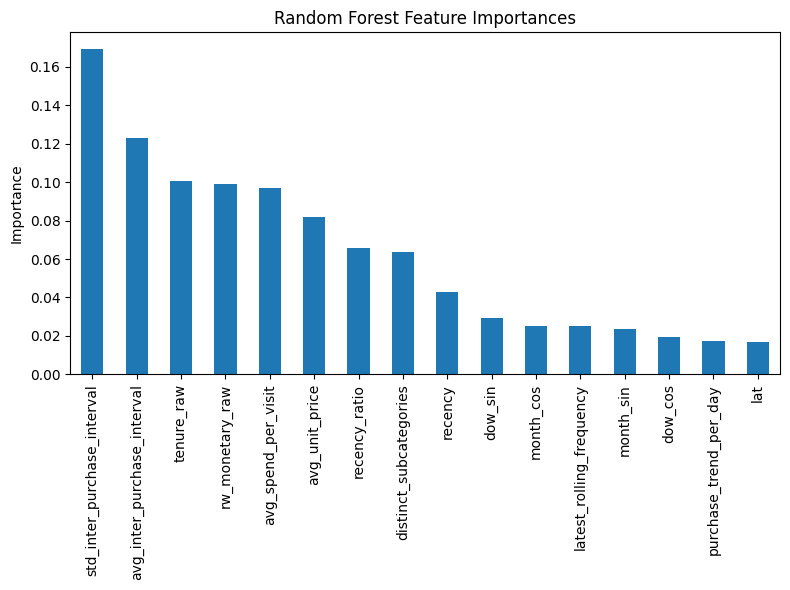

In [0]:
# Global Feature Importance – Random Forest
# ------------------------------------------

# Retrieve feature importances from the trained champion Random Forest model
importances = champion_model.feature_importances_

# Create a sorted Series for better visualization
feat_imp = pd.Series(importances, index=feature_cols).sort_values(ascending=False)

# Plot bar chart of all feature importances
plt.figure(figsize=(8, 6))
feat_imp.plot(kind="bar")
plt.title("Random Forest Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Top 5 features: ['std_inter_purchase_interval', 'avg_inter_purchase_interval', 'tenure_raw', 'rw_monetary_raw', 'avg_spend_per_visit']


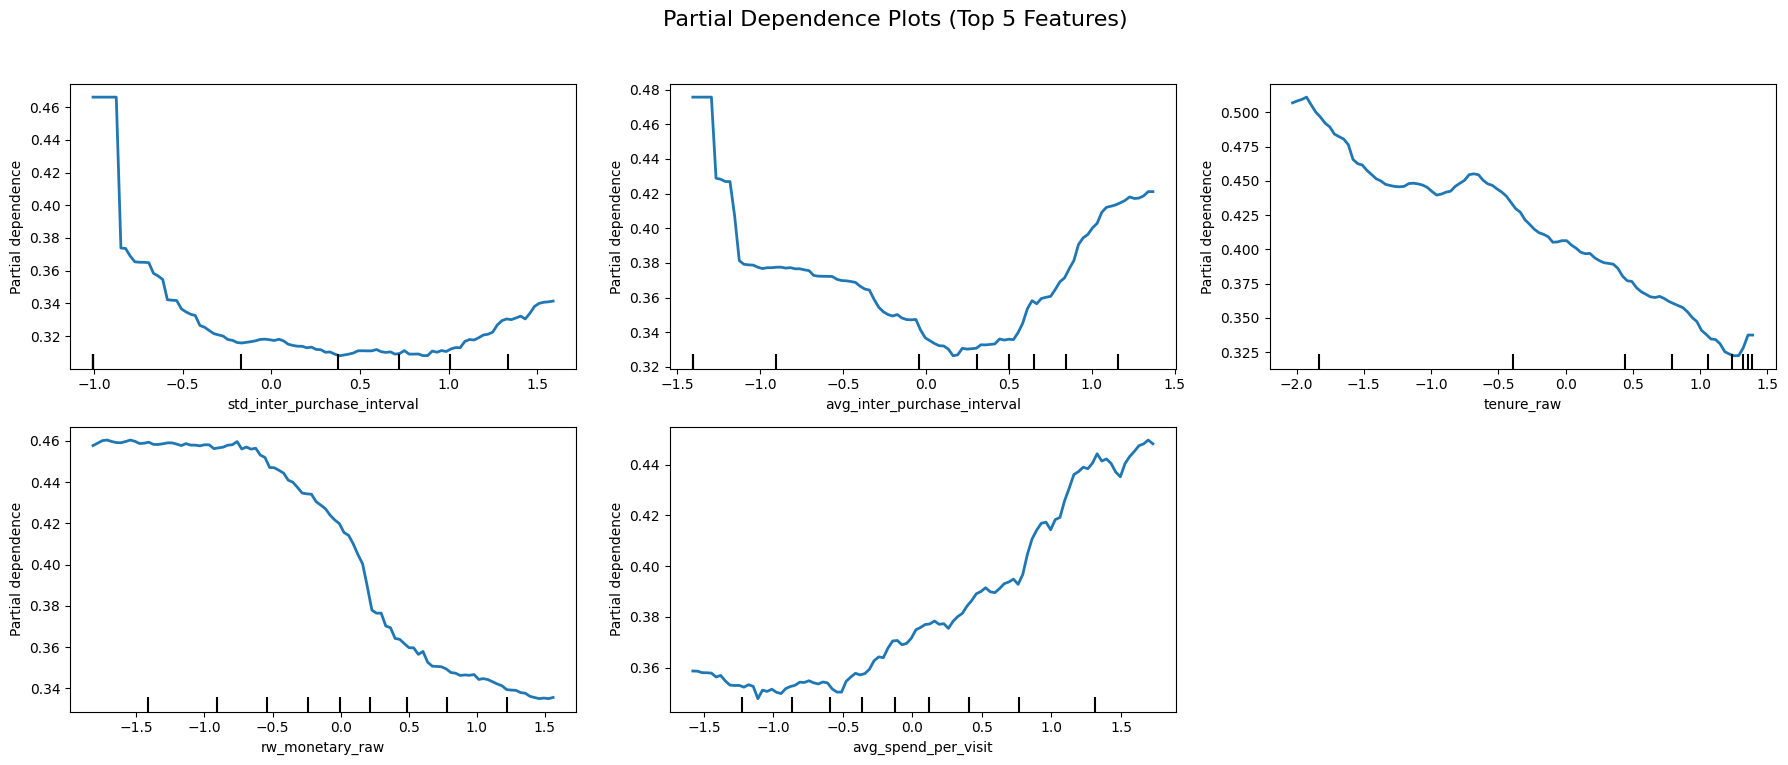

In [0]:
# Partial Dependence Plots – Top 5 Most Important Features
# ---------------------------------------------------------

# Select top 5 most important features for detailed PDP visualization
top5 = feat_imp.head(5).index.tolist()
print("Top 5 features:", top5)

# Set up subplot grid (2 rows × 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

# Generate PDP for each of the top 5 features
for i, feat in enumerate(top5):
    PartialDependenceDisplay.from_estimator(
        champion_model,
        X_test,
        [feat],
        ax=axes[i],
        line_kw={"color": "C0", "linewidth": 2}
    )

# Turn off the sixth (empty) subplot
axes[-1].axis("off")

plt.suptitle("Partial Dependence Plots (Top 5 Features)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

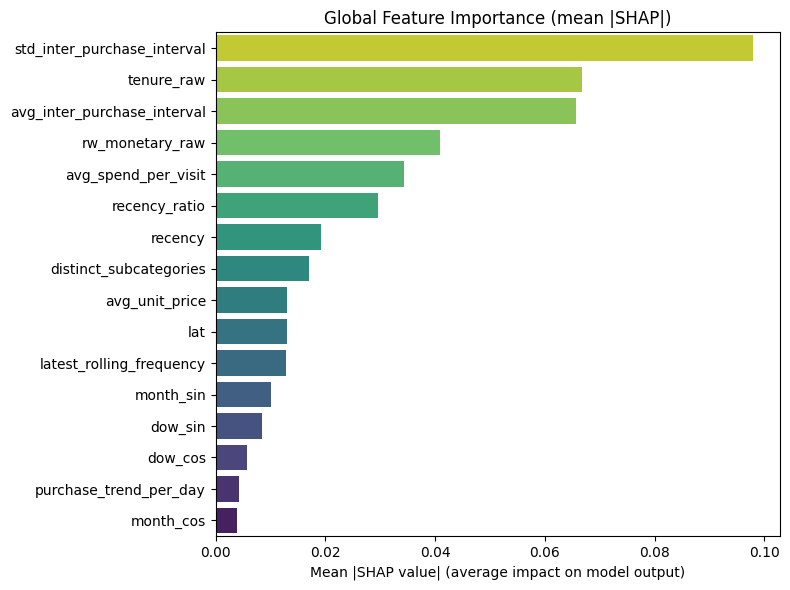

In [0]:
# SHAP Analysis – Global Interpretability with TreeExplainer
# -----------------------------------------------------------

# Initialize SHAP TreeExplainer using the trained champion model
explainer = shap.TreeExplainer(champion_model, feature_perturbation="tree_path_dependent")

# Sample 1000 rows from test set for interpretability speed
X_sample = X_test.sample(1000, random_state=42)

# Compute SHAP values for both output classes
# Index 1 corresponds to class 'churn=1' (positive class)
all_shaps = explainer.shap_values(X_sample)
shap_pos = all_shaps[1]  # shape = (1000, n_features)

# Calculate mean absolute SHAP value per feature
# This reflects global importance based on average impact
mean_abs_shap = np.abs(shap_pos).mean(axis=0)
feat_imp = pd.Series(mean_abs_shap, index=feature_cols).sort_values(ascending=True)

# Bar plot of global SHAP importances
plt.figure(figsize=(8, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Global Feature Importance (mean |SHAP|)")
plt.xlabel("Mean |SHAP value| (average impact on model output)")
plt.ylabel("")
plt.gca().invert_yaxis()  # largest at top
plt.tight_layout()
plt.show()

The figure layout has changed to tight


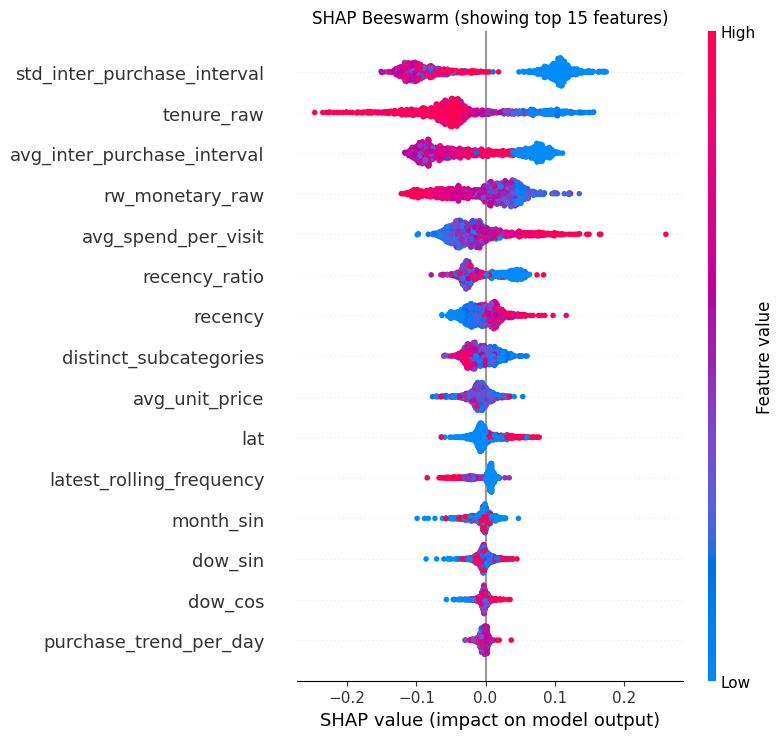

In [0]:
# SHAP Beeswarm Plot – Local and Global Distribution
# ---------------------------------------------------

# Visualize top 15 most impactful features using SHAP summary plot
plt.figure(figsize=(8, 6))
shap.summary_plot(
    shap_pos,
    X_sample,
    feature_names=feature_cols,
    max_display=15,
    show=False
)
plt.title("SHAP Beeswarm (showing top 15 features)")
plt.tight_layout()
plt.show()